In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.columns = ['Signal','Density']

<Axes: xlabel='Signal', ylabel='Density'>

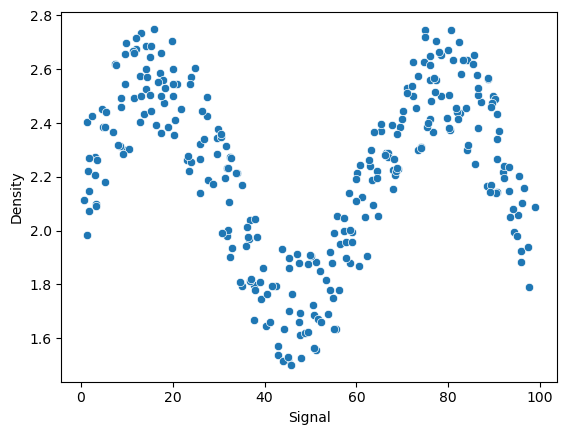

In [5]:
sns.scatterplot(x='Signal',y='Density',data=df)

In [21]:
X = df['Signal'].values.reshape(-1,1)
y = df['Density']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

<h1>Linear Regression</h1>

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr_model = LinearRegression()

In [18]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [22]:
lr_preds = lr_model.predict(X_test)

In [23]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [25]:
mean_absolute_error(y_test,lr_preds)

0.211198973318633

In [26]:
np.sqrt(mean_squared_error(y_test,lr_preds))

0.2570051996584629

<Axes: xlabel='Signal', ylabel='Density'>

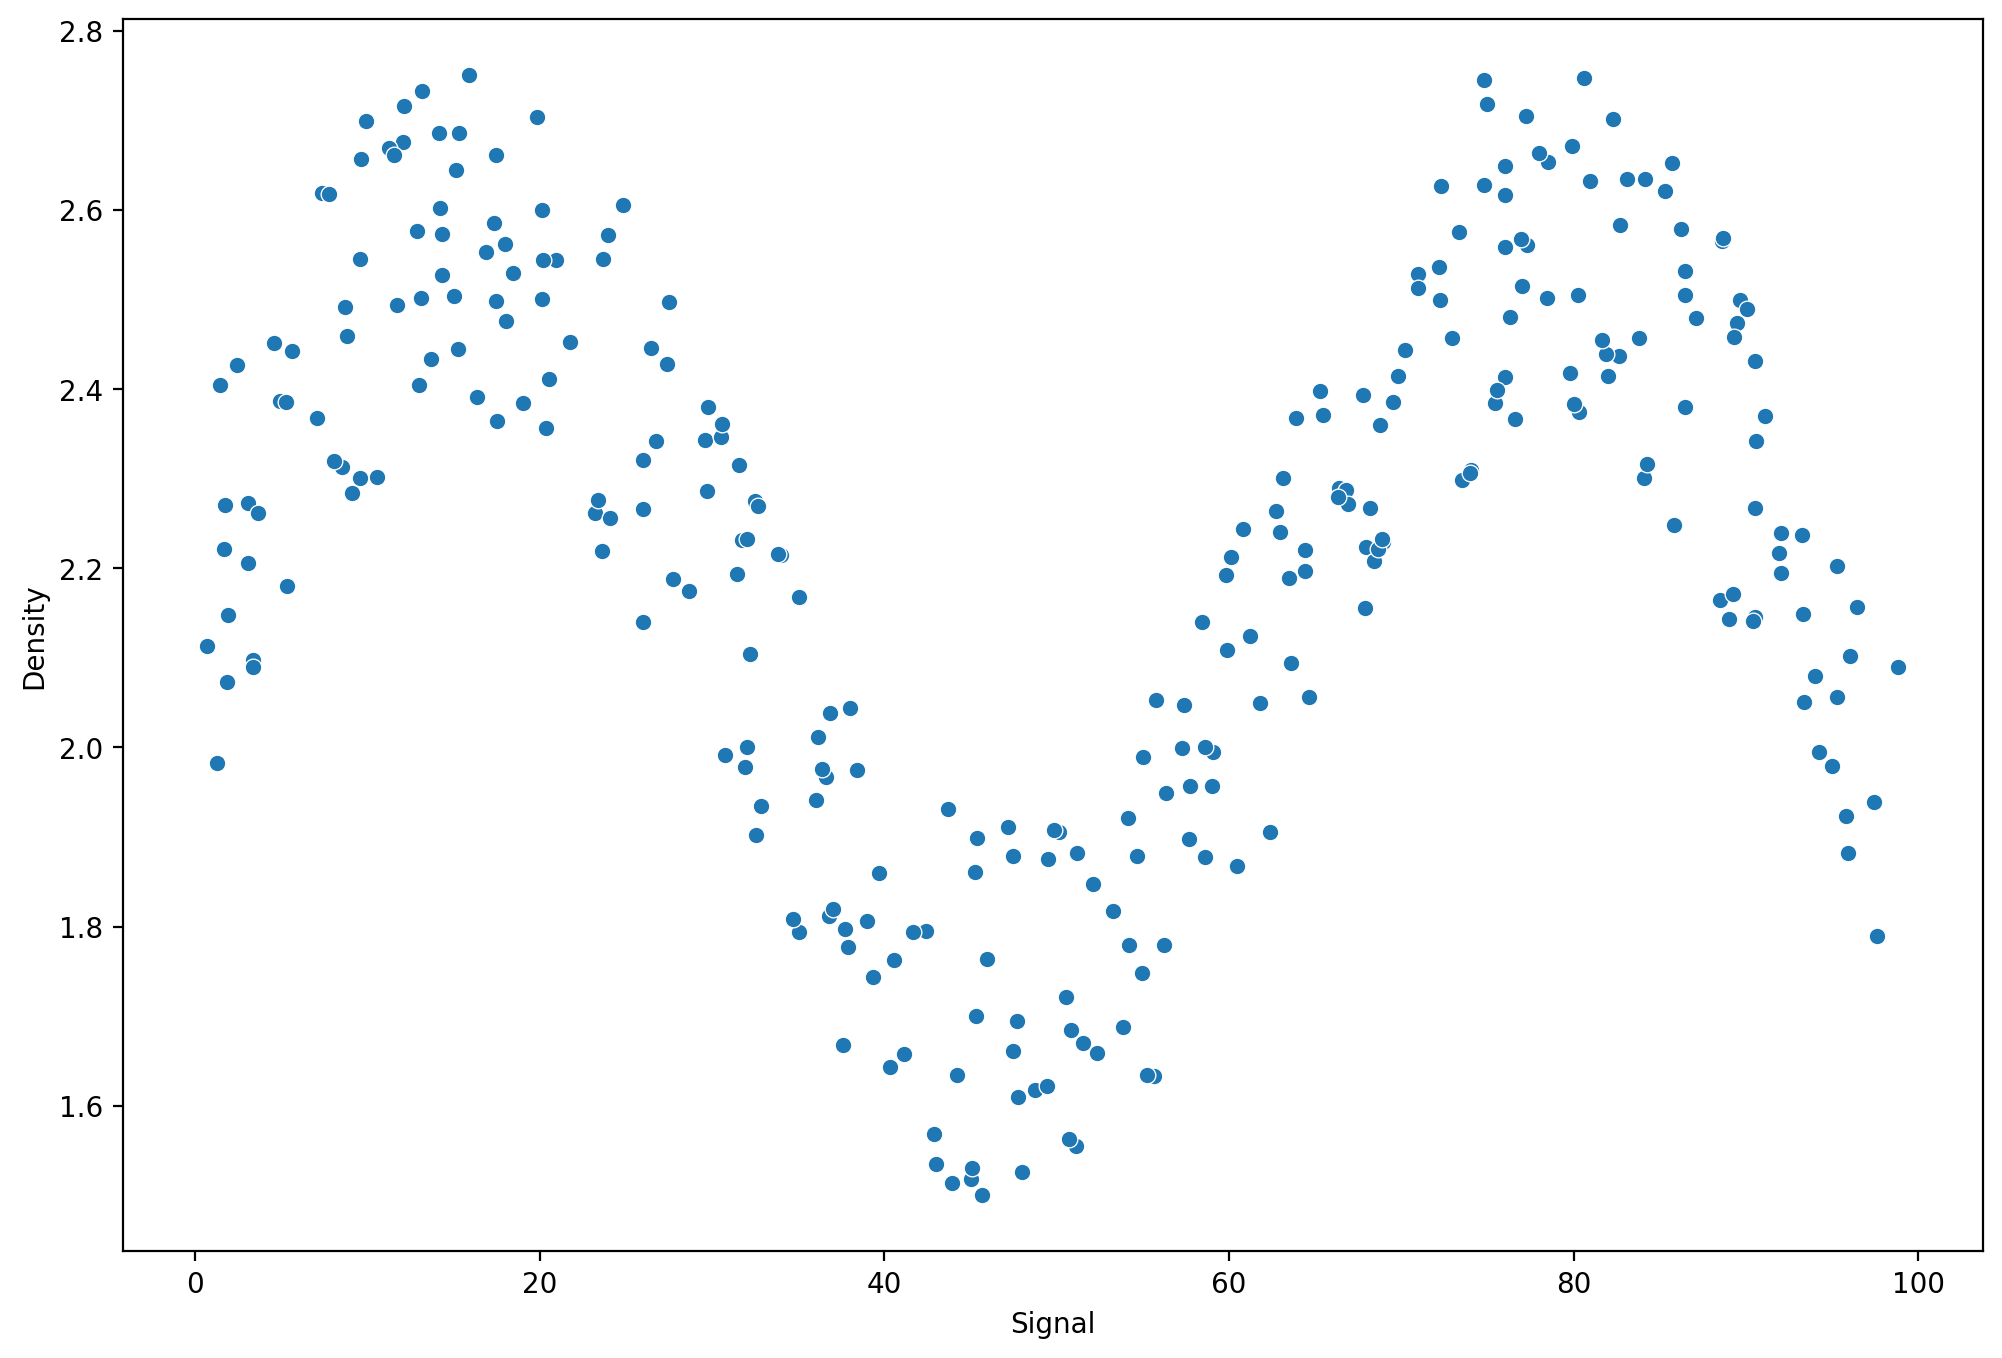

In [27]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

In [29]:
signal_range = np.arange(0,100)

In [30]:
signal_range

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [32]:
signal_preds = lr_model.predict(signal_range.reshape(-1,1))

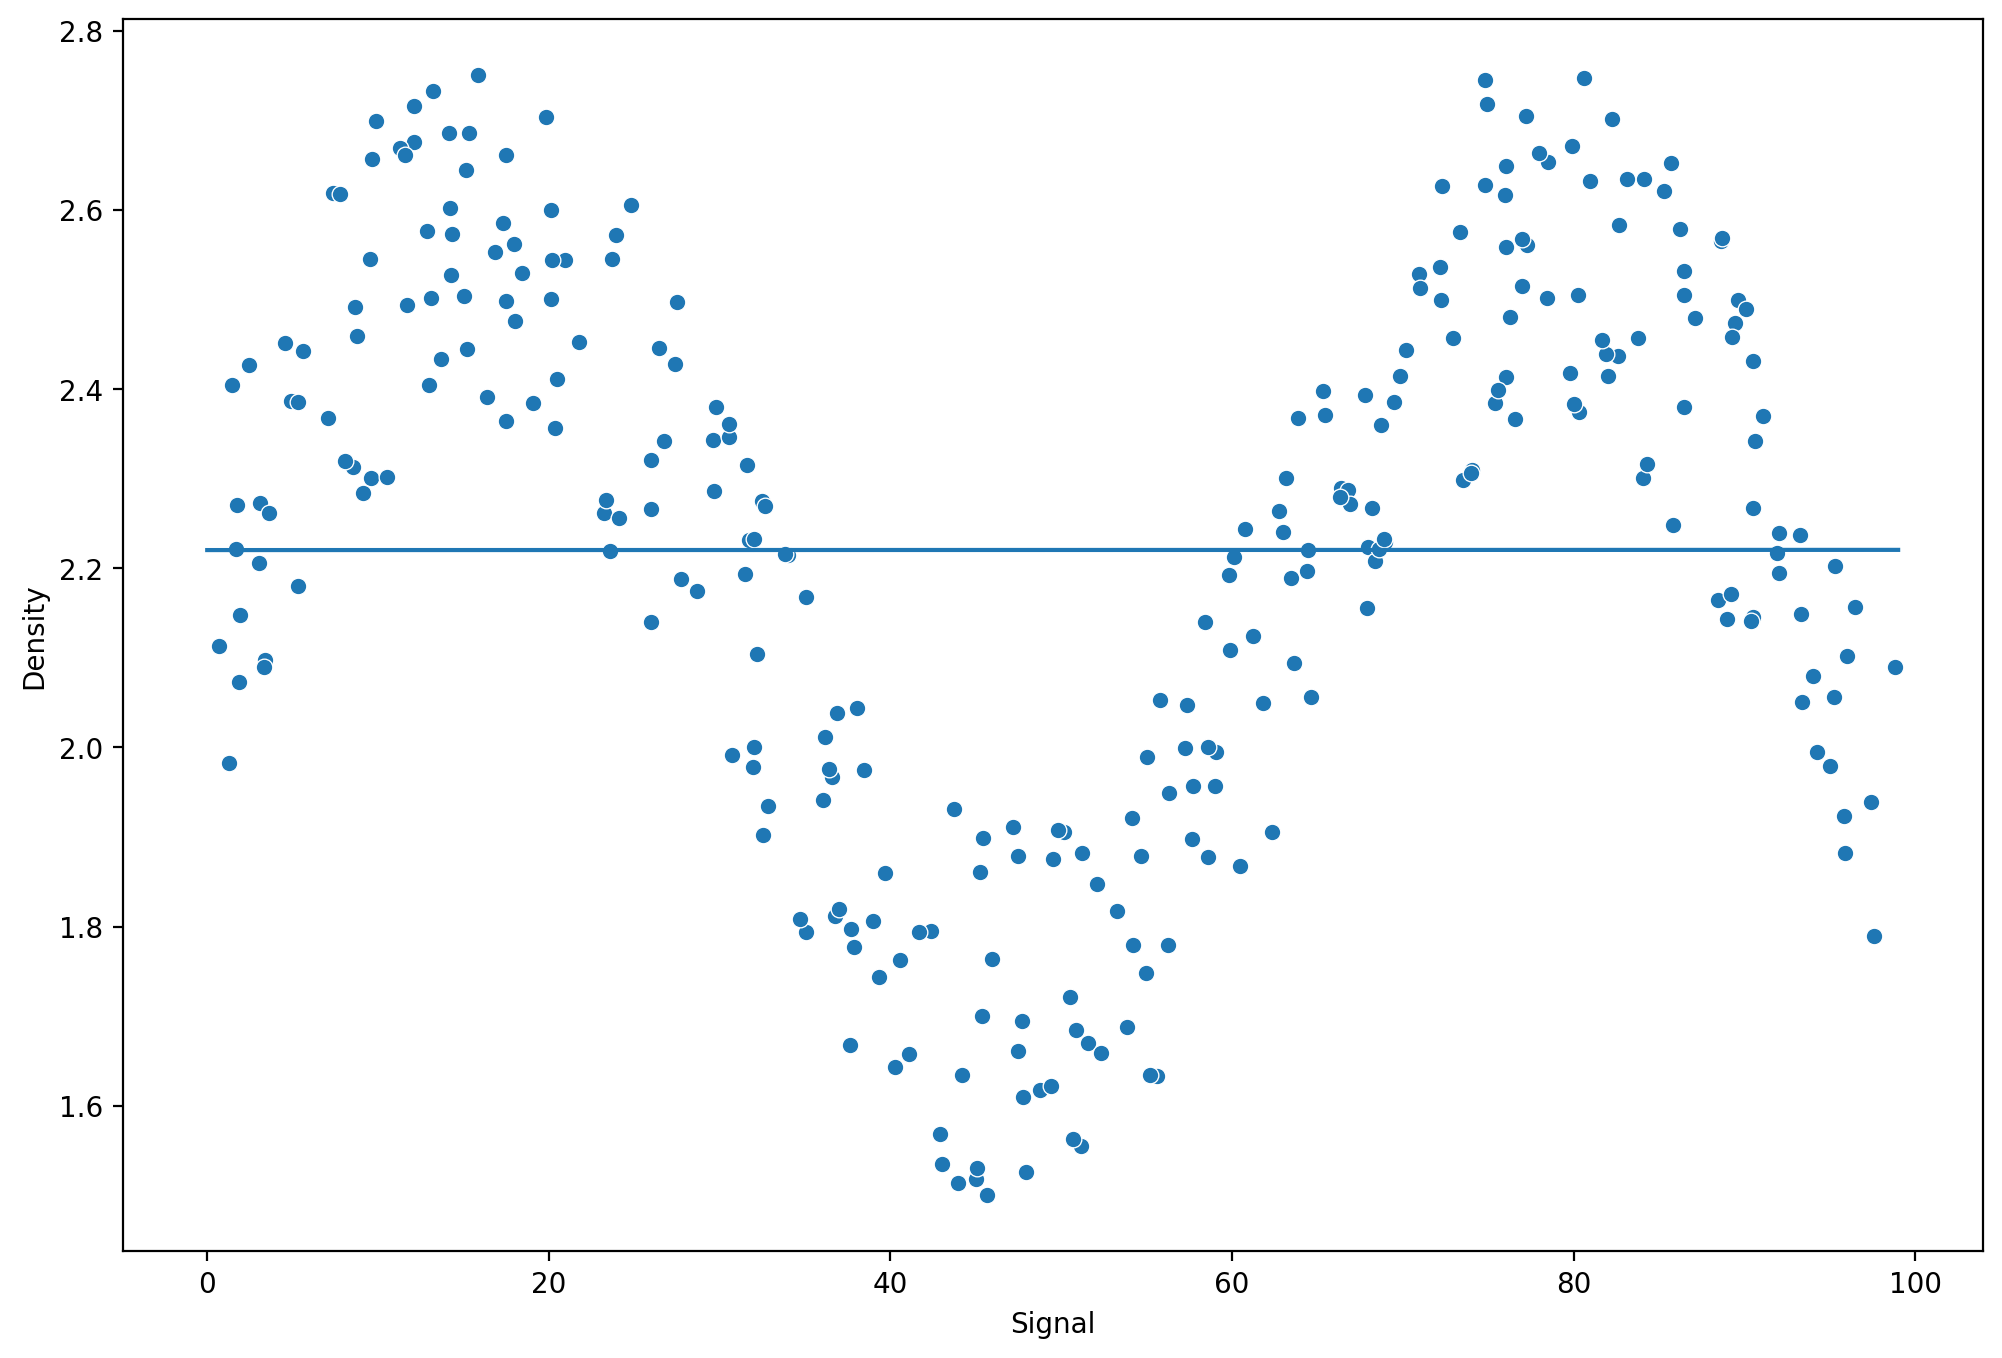

In [34]:
plt.figure(figsize=(12,8),dpi=200)
sns.scatterplot(x='Signal',y='Density',data=df)

plt.plot(signal_range,signal_preds)

<h1>Polynomial Regression</h1>

In [37]:
def run_model(model,X_train,y_train,X_test,y_test):
    
    #FIT MODEL TRAINING
    model.fit(X_train,y_train)
    
    # GET METRICS
    preds = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,preds))
    mae = mean_absolute_error(y_test,preds)
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    # PLOT RESULTS MODEL SIGNAL RANGE
    signal_range = np.arange(0,100)
    signal_preds = model.predict(signal_range.reshape(-1,1))
    
    plt.figure(figsize=(12,8),dpi=200)
    sns.scatterplot(x='Signal',y='Density',data=df,color='black')

    plt.plot(signal_range,signal_preds)

MAE: 0.211198973318633
RMSE: 0.2570051996584629


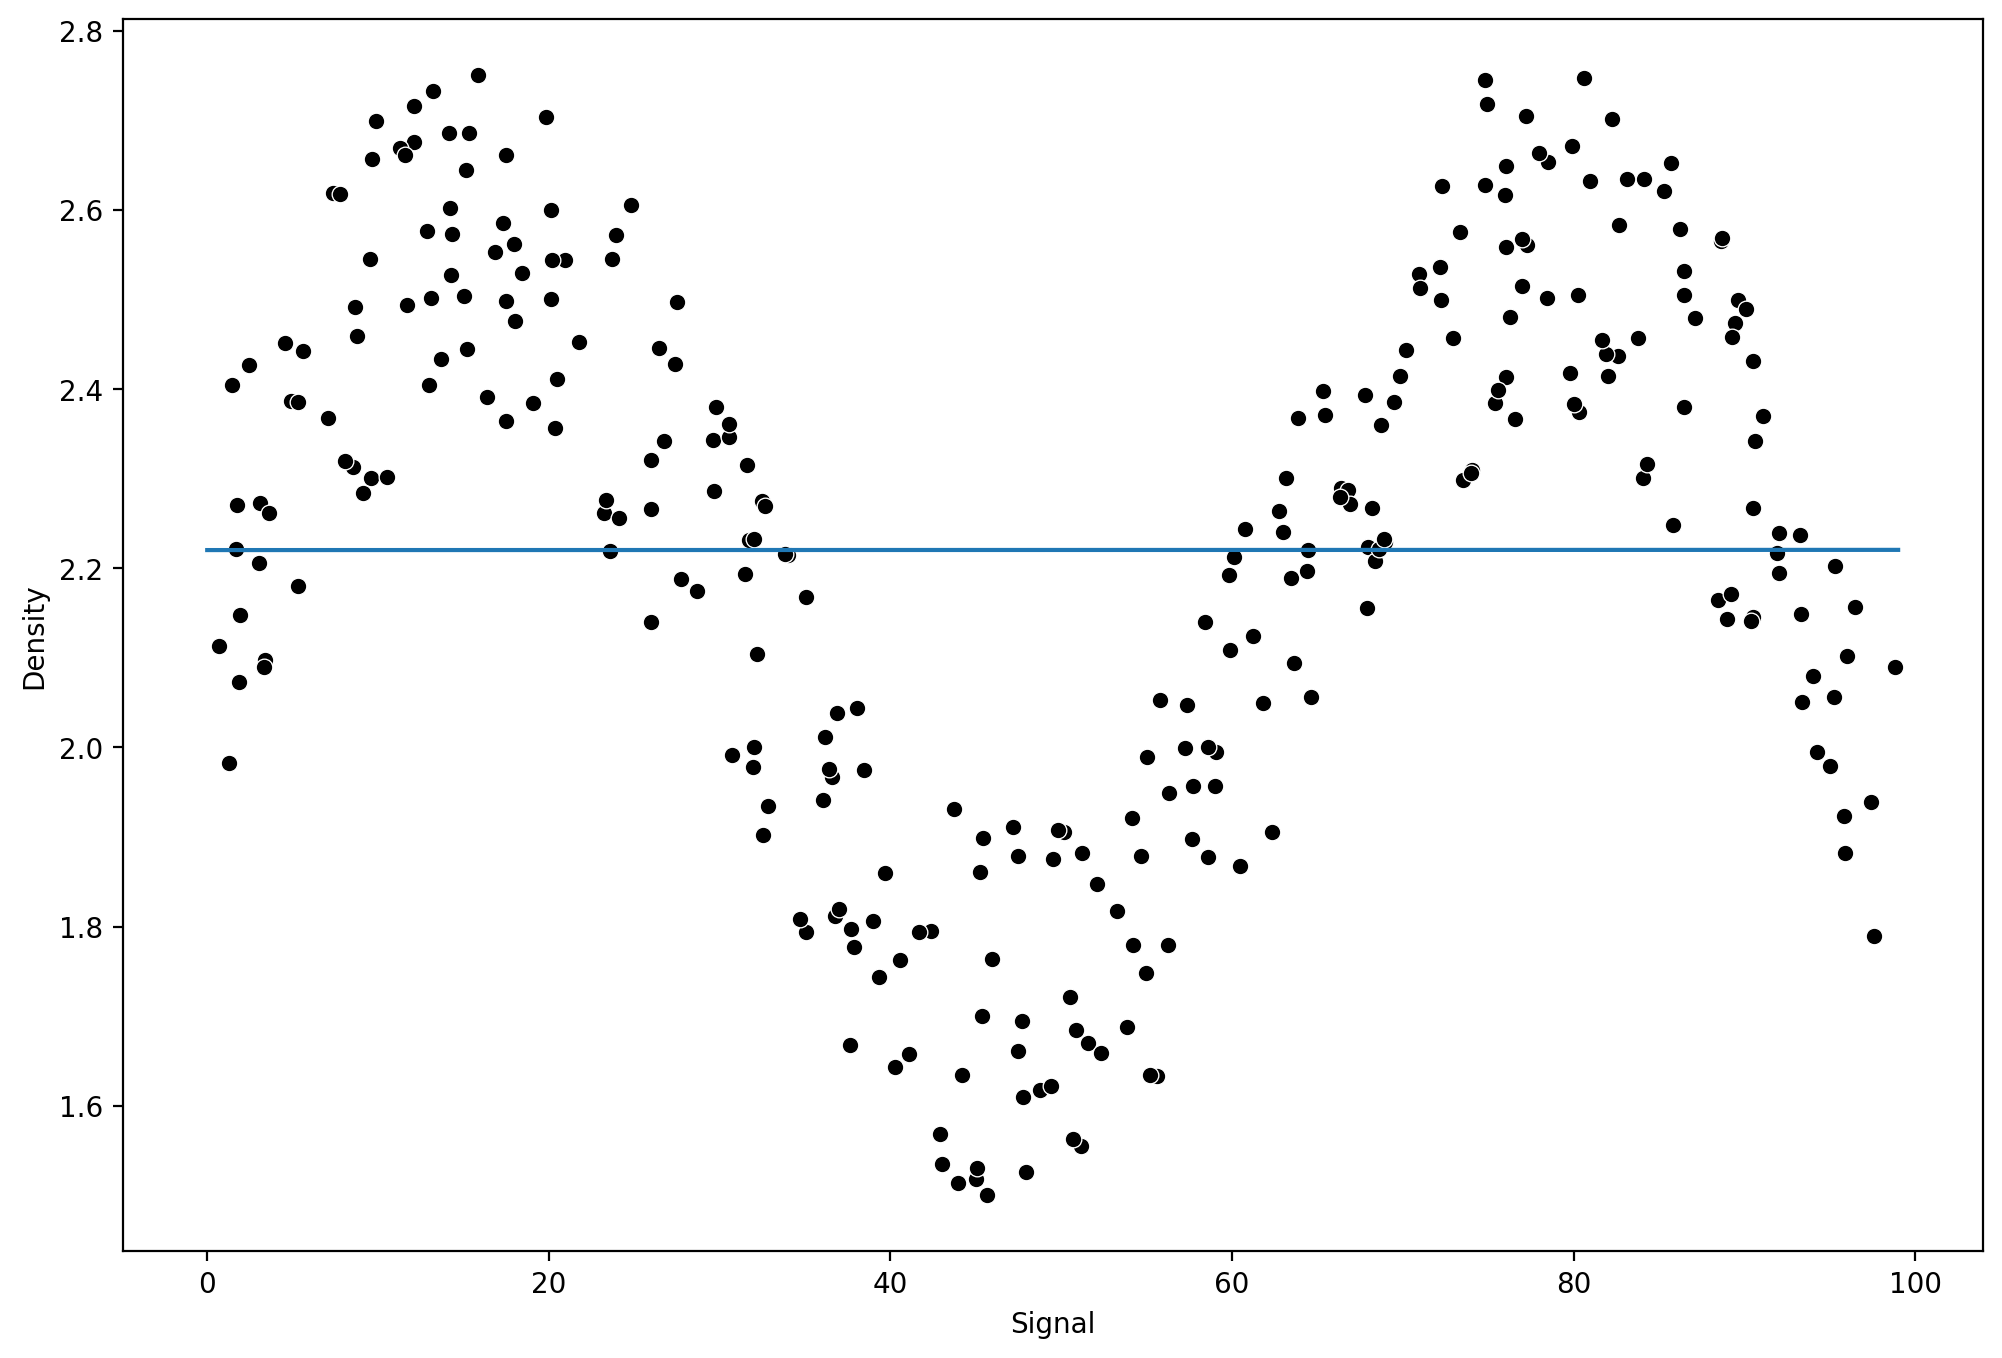

In [38]:
model = LinearRegression()
run_model(model,X_train,y_train,X_test,y_test)

In [39]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [42]:
pipe = make_pipeline(PolynomialFeatures(degree=10),
                    LinearRegression())

MAE: 0.12466481505481065
RMSE: 0.14034142046390416


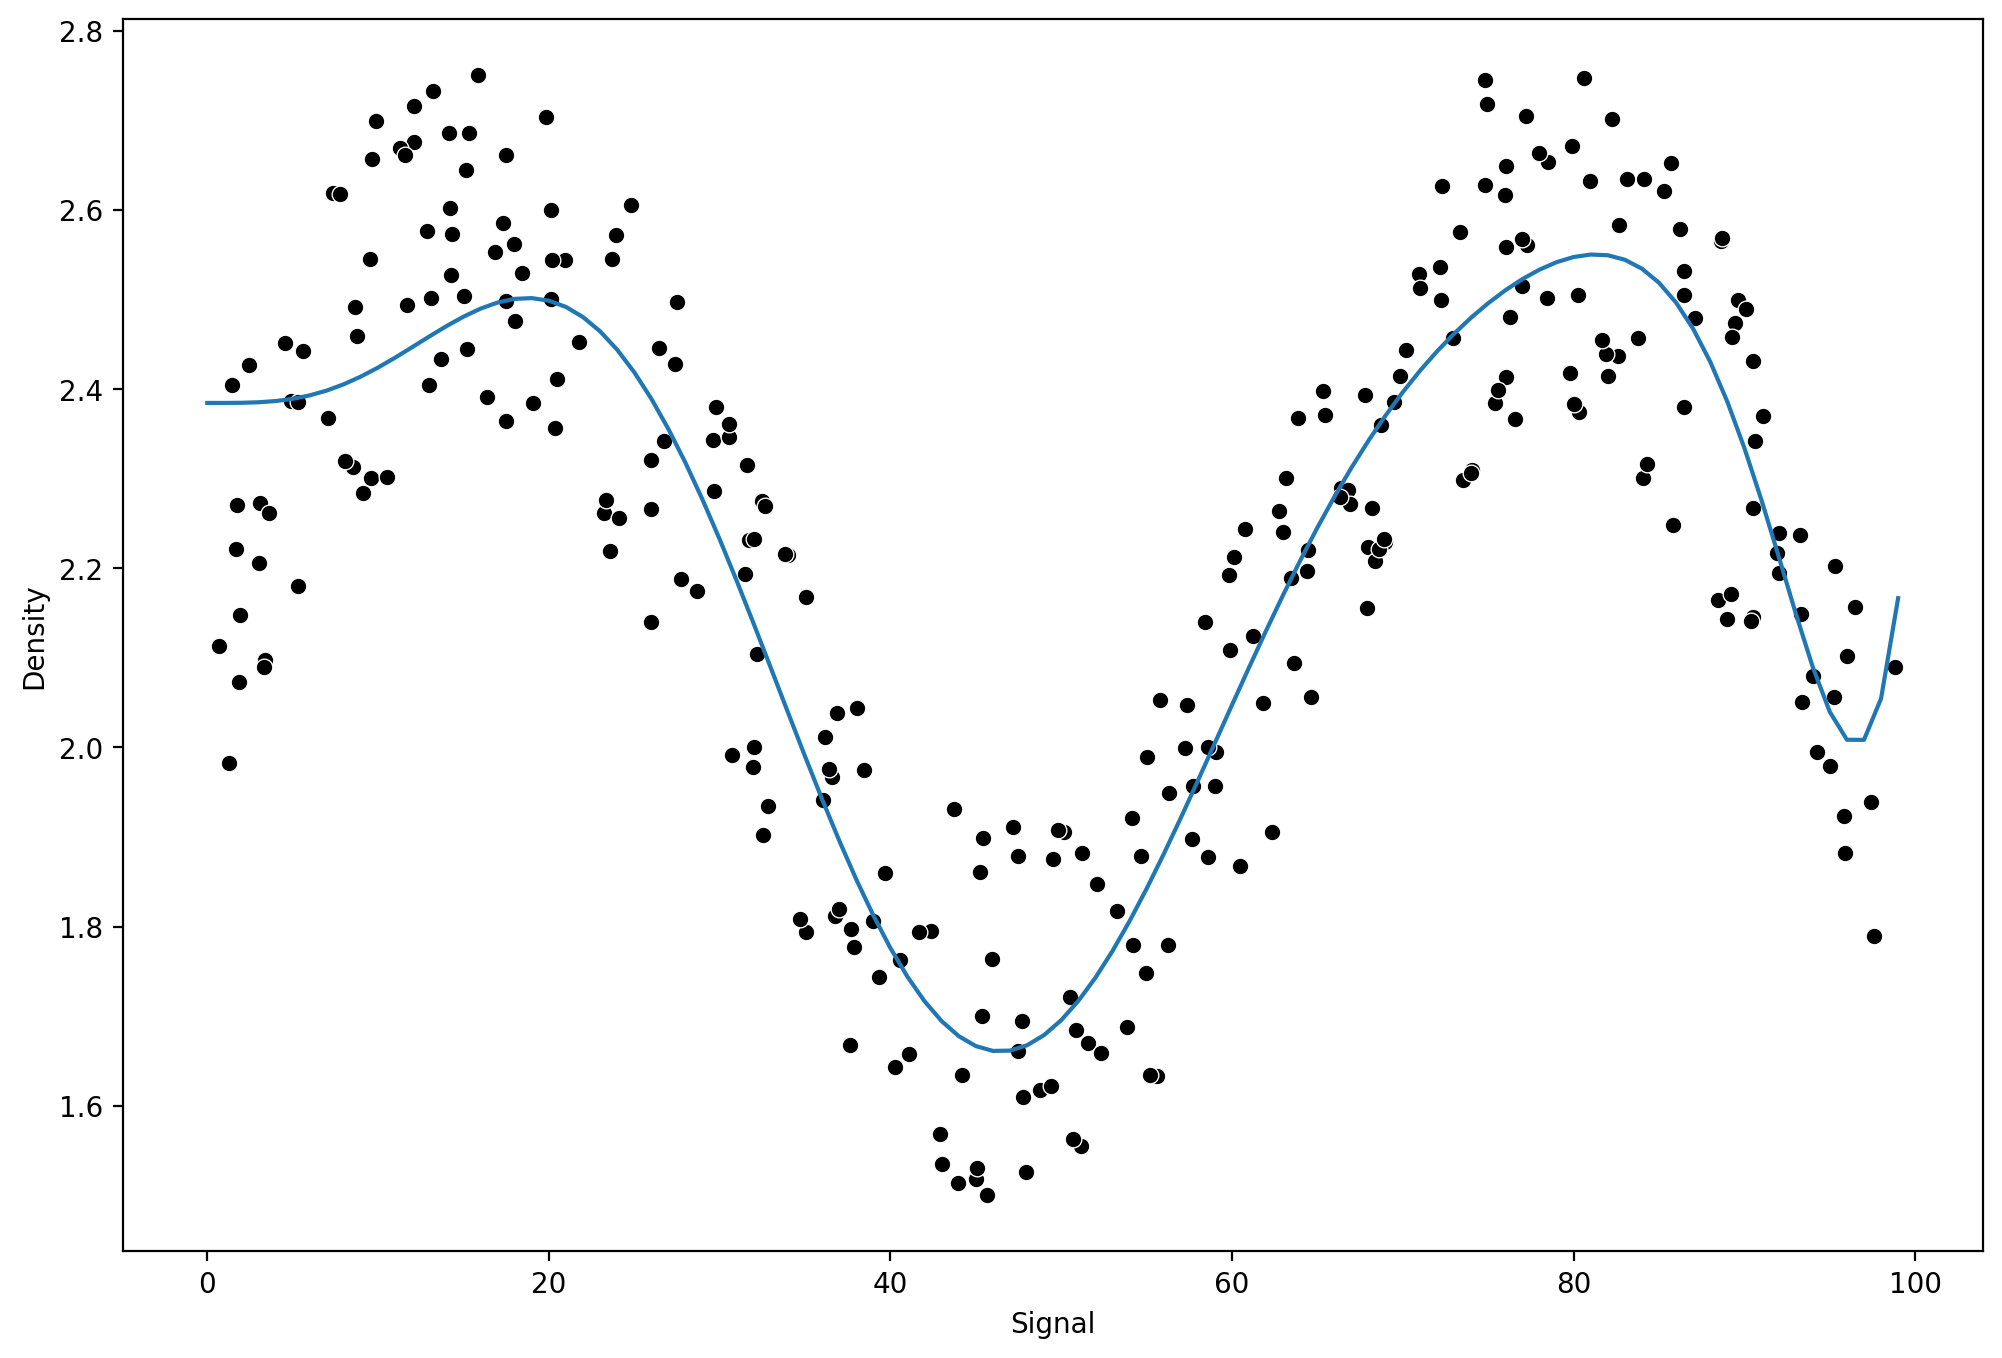

In [43]:
run_model(pipe,X_train,y_train,X_test,y_test)

<h1>KNeighborsRegressor</h1>

In [44]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337
MAE: 0.12198383614100558
RMSE: 0.13730685016923647
MAE: 0.11635971693292672
RMSE: 0.13277855732740926
MAE: 0.13363165935705318
RMSE: 0.15954234753677107


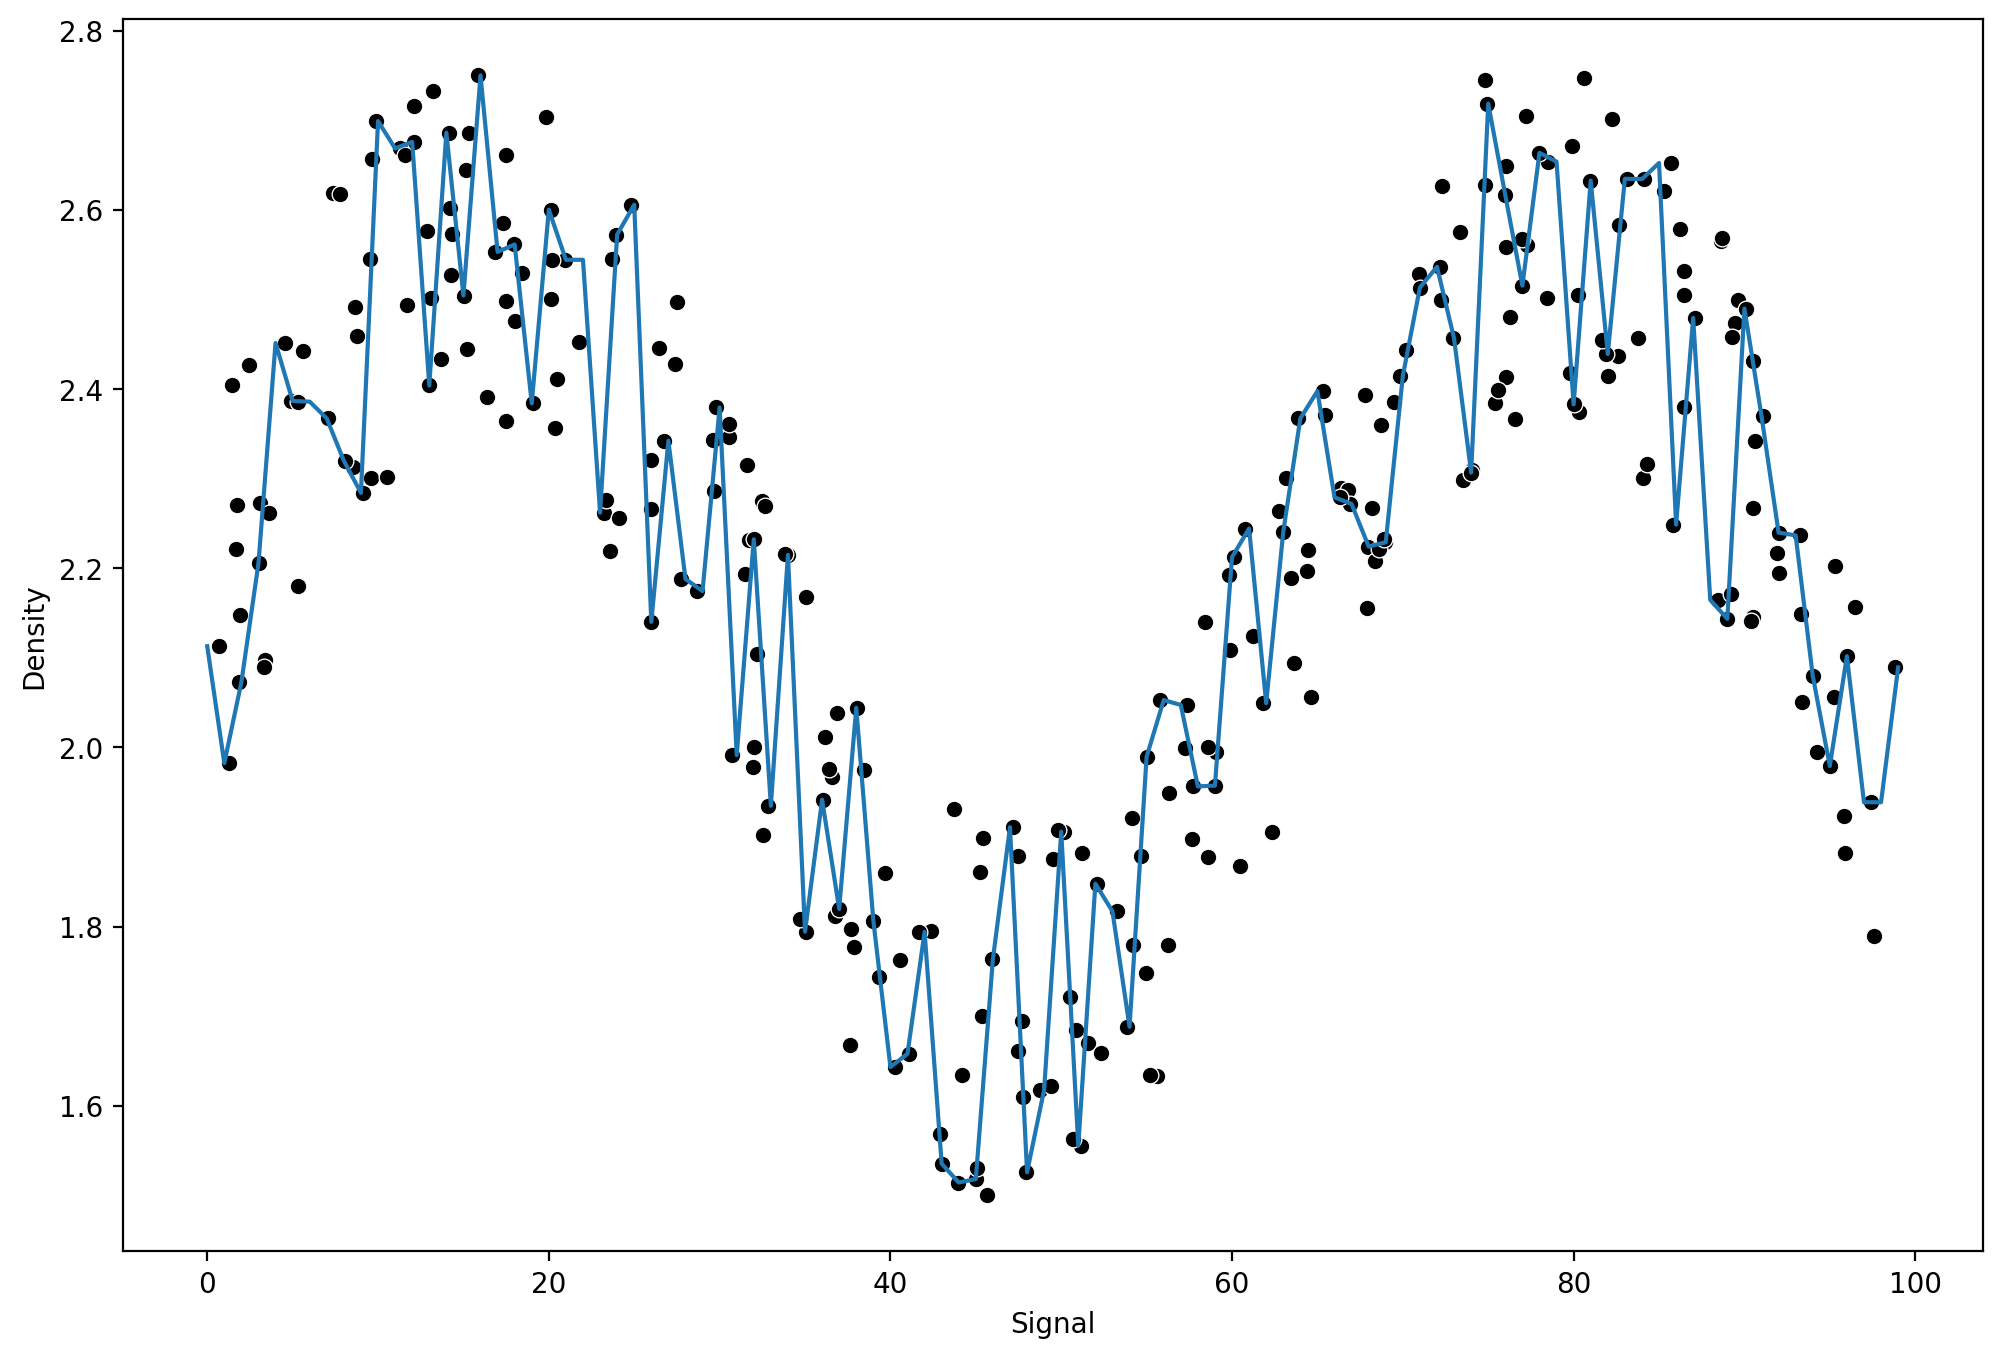

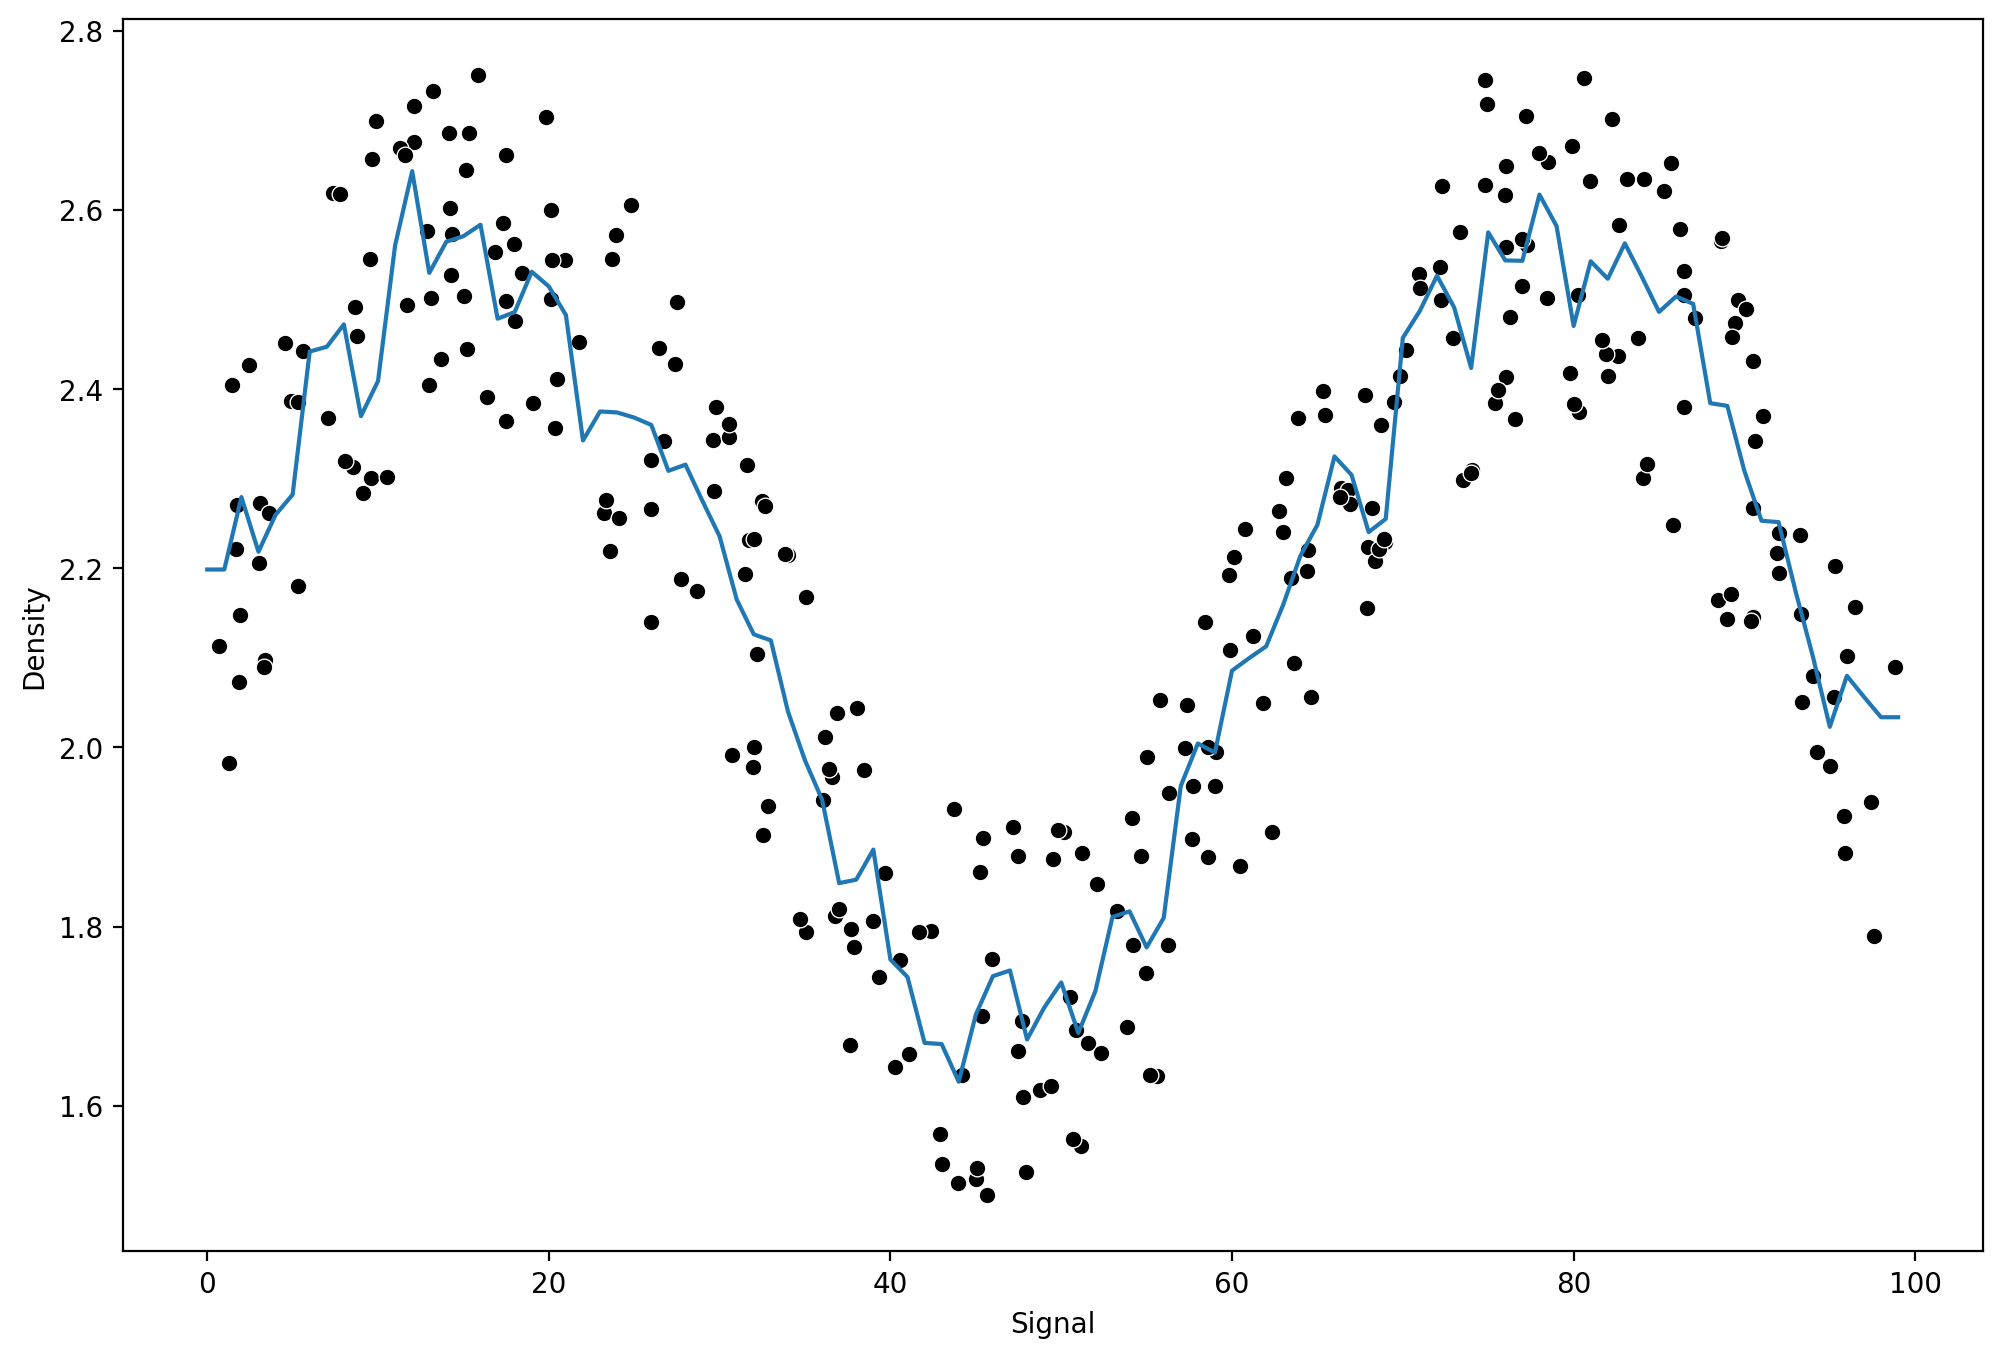

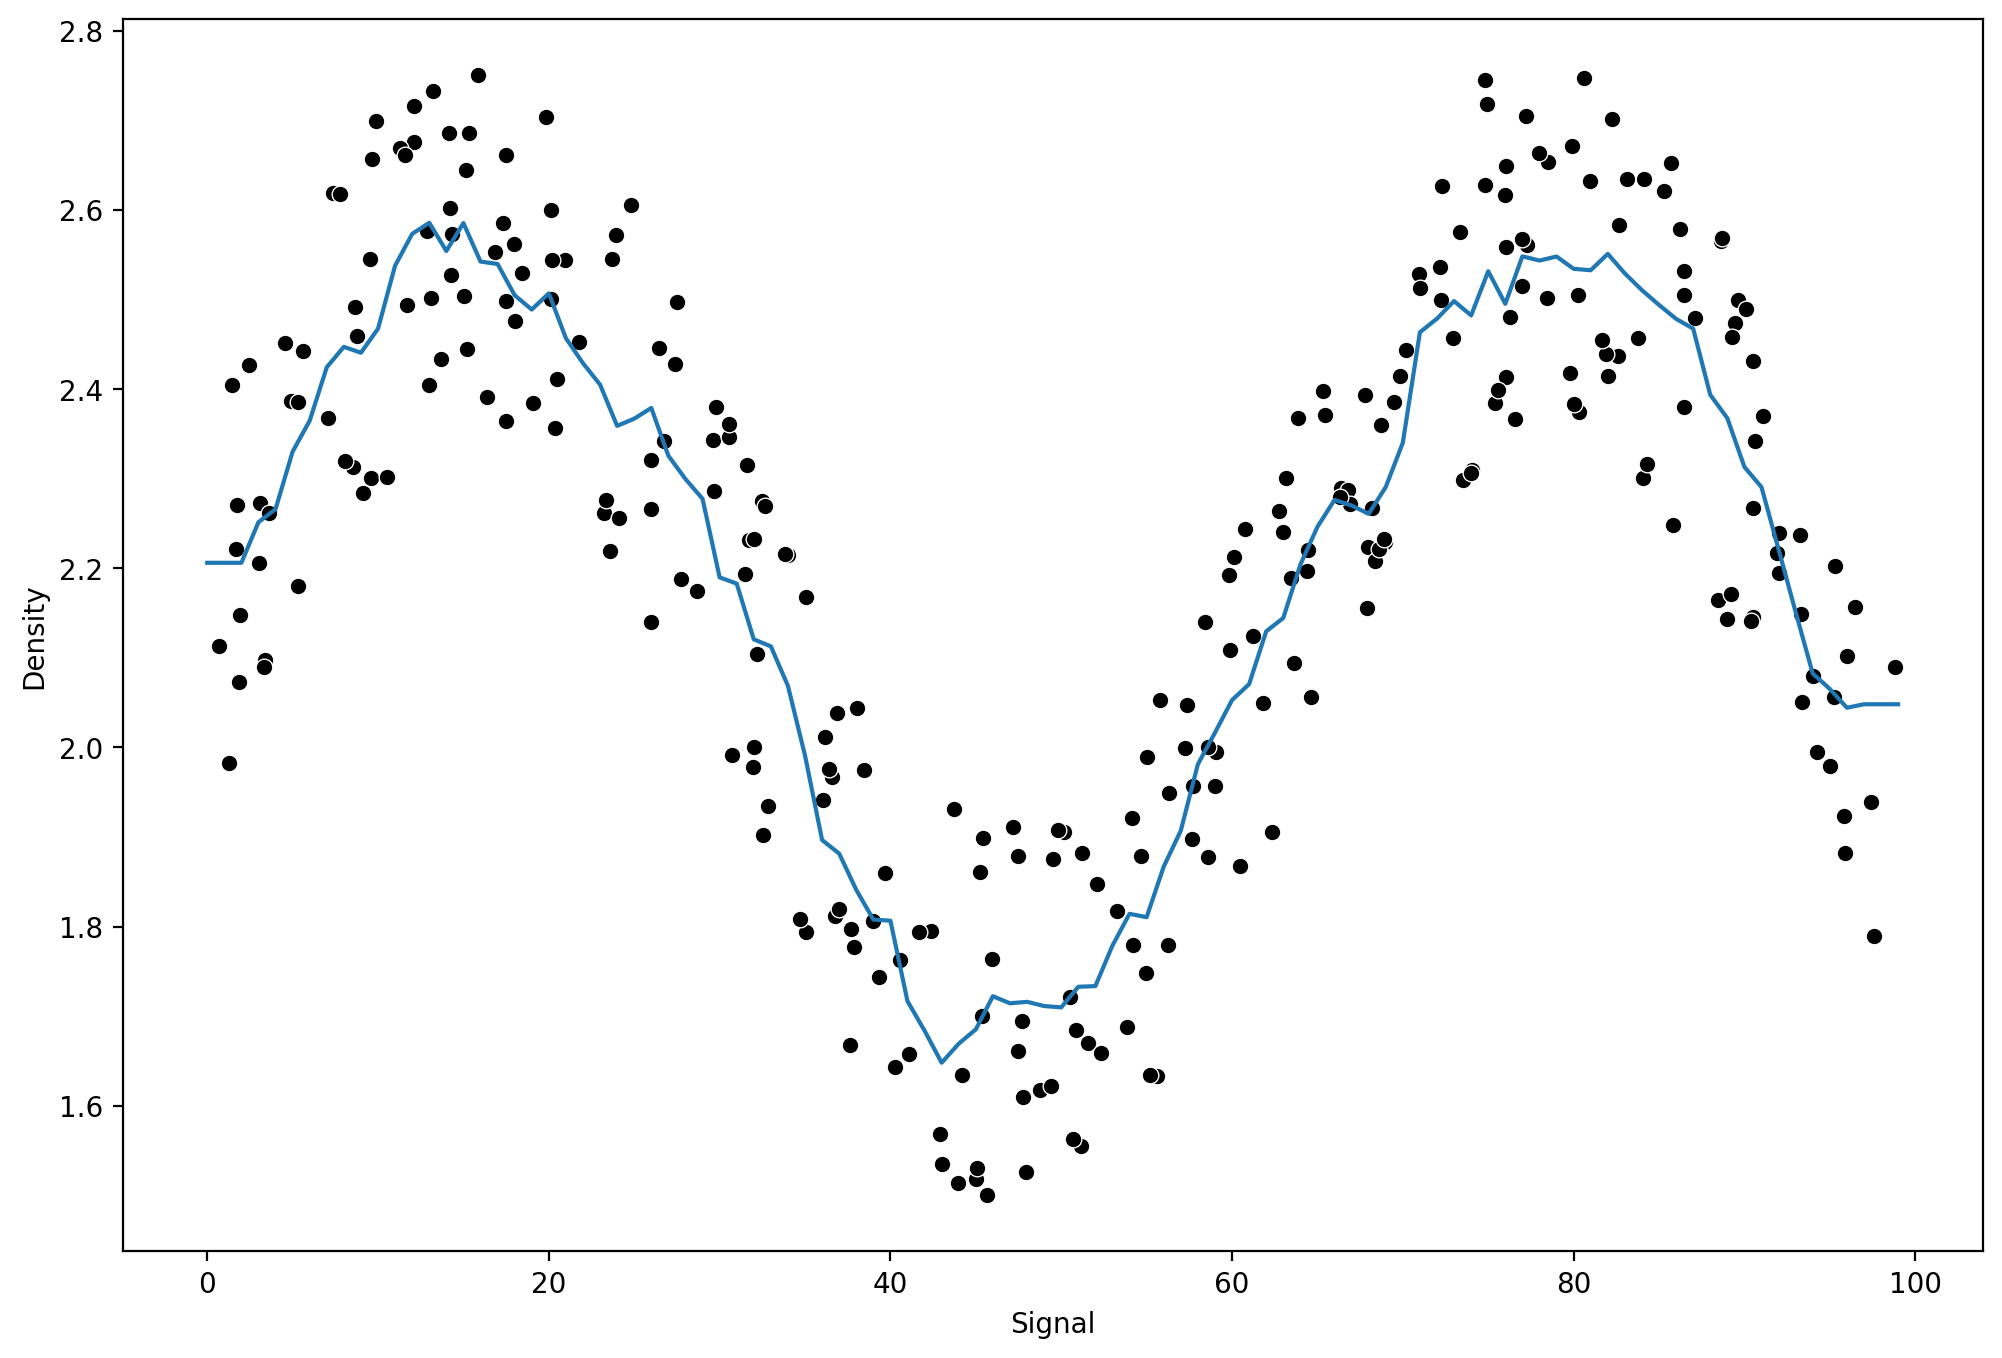

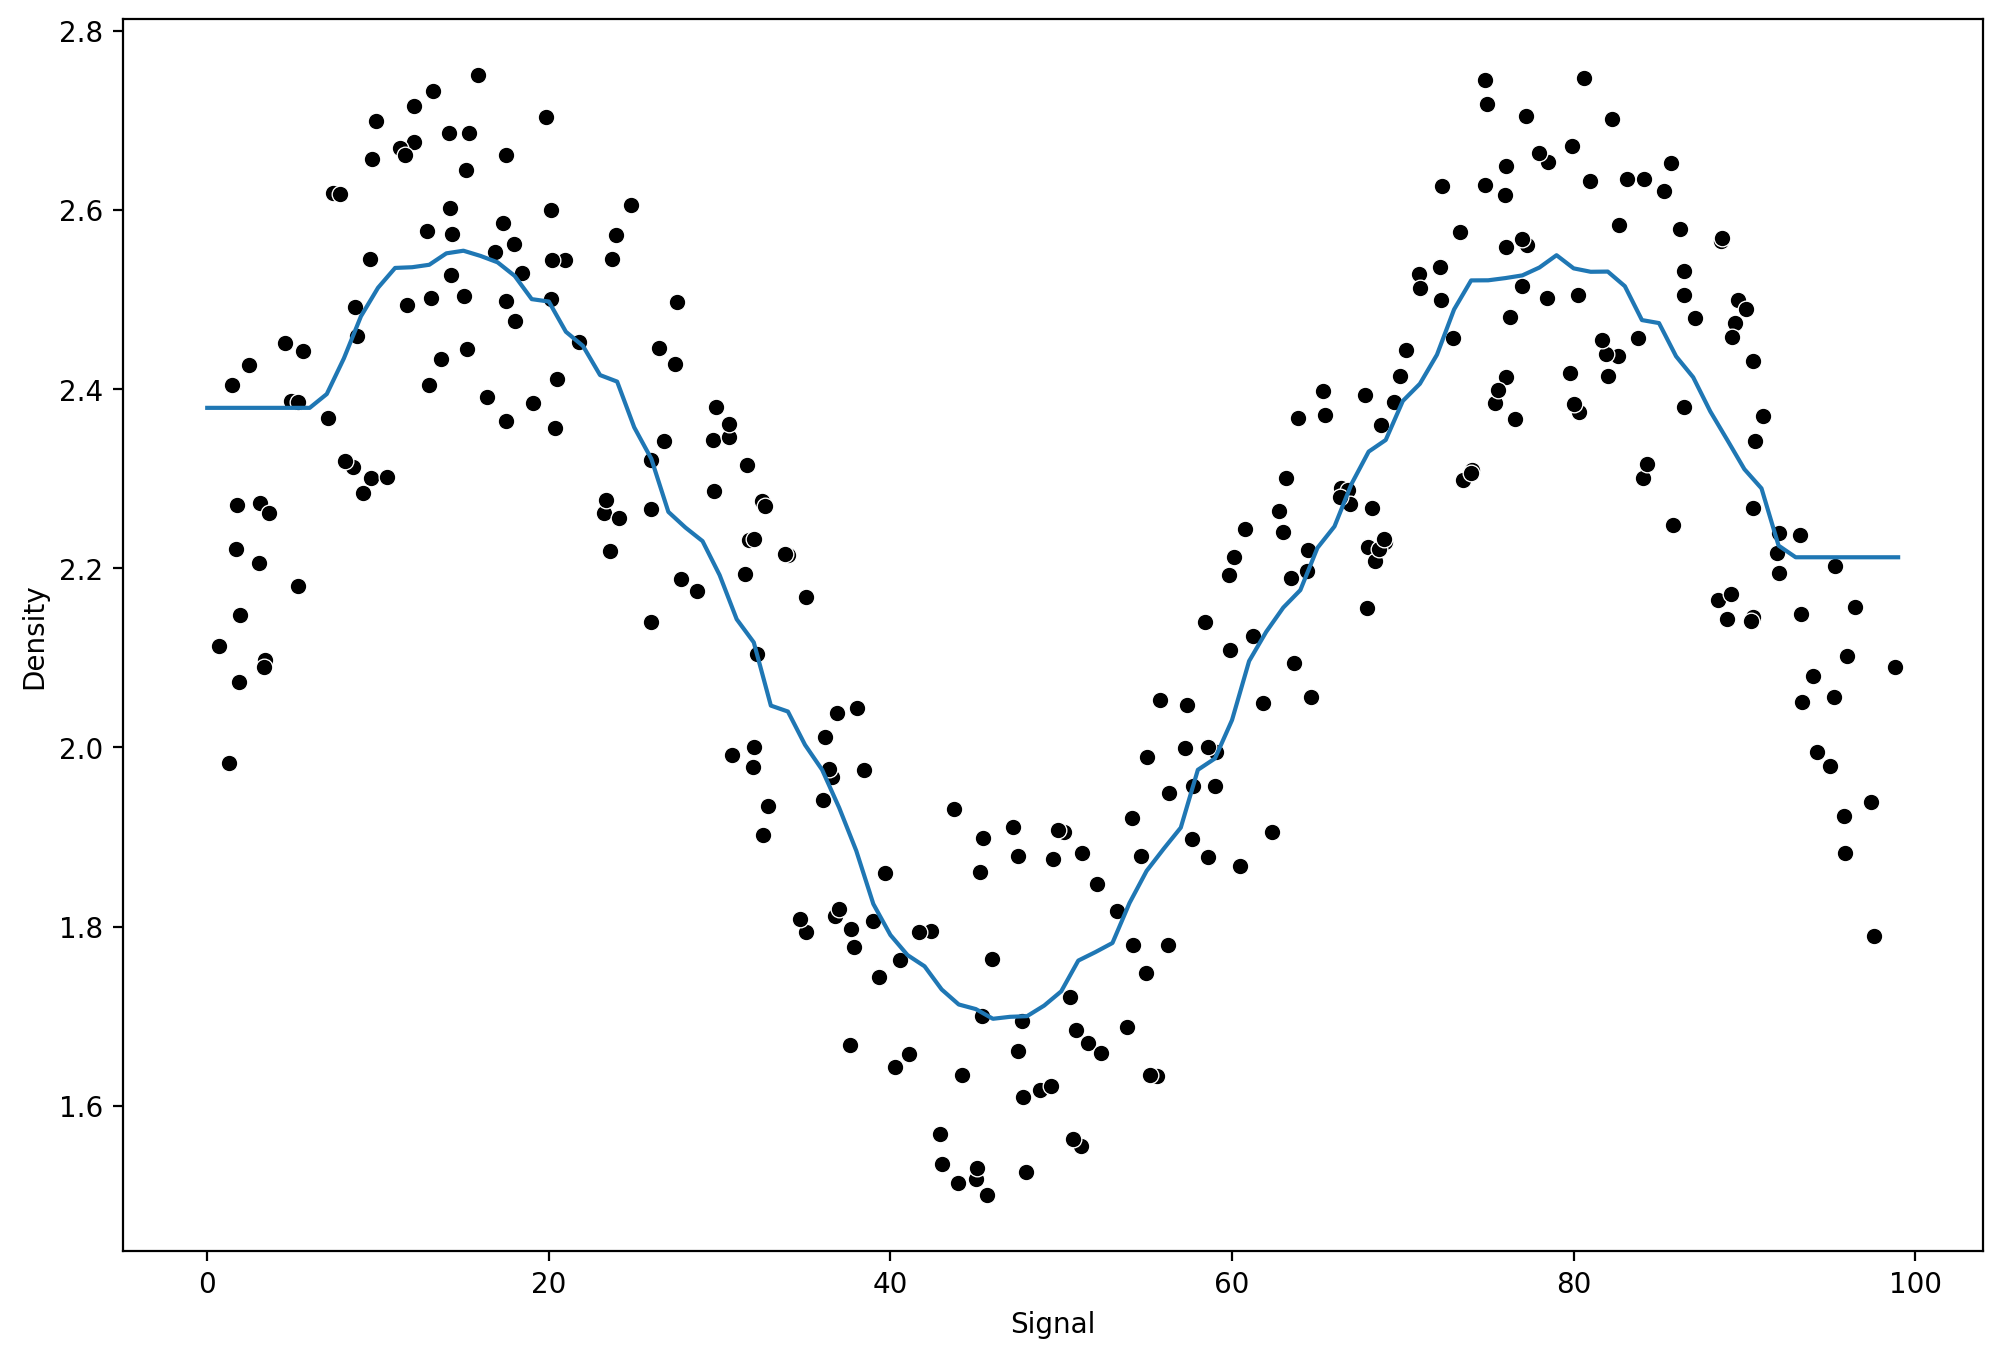

In [46]:
k_values = [1,5,10,30]

for n in k_values:
    
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

<h1>DecisionTree Regressor</h1>

In [47]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442378
RMSE: 0.1523487028635337


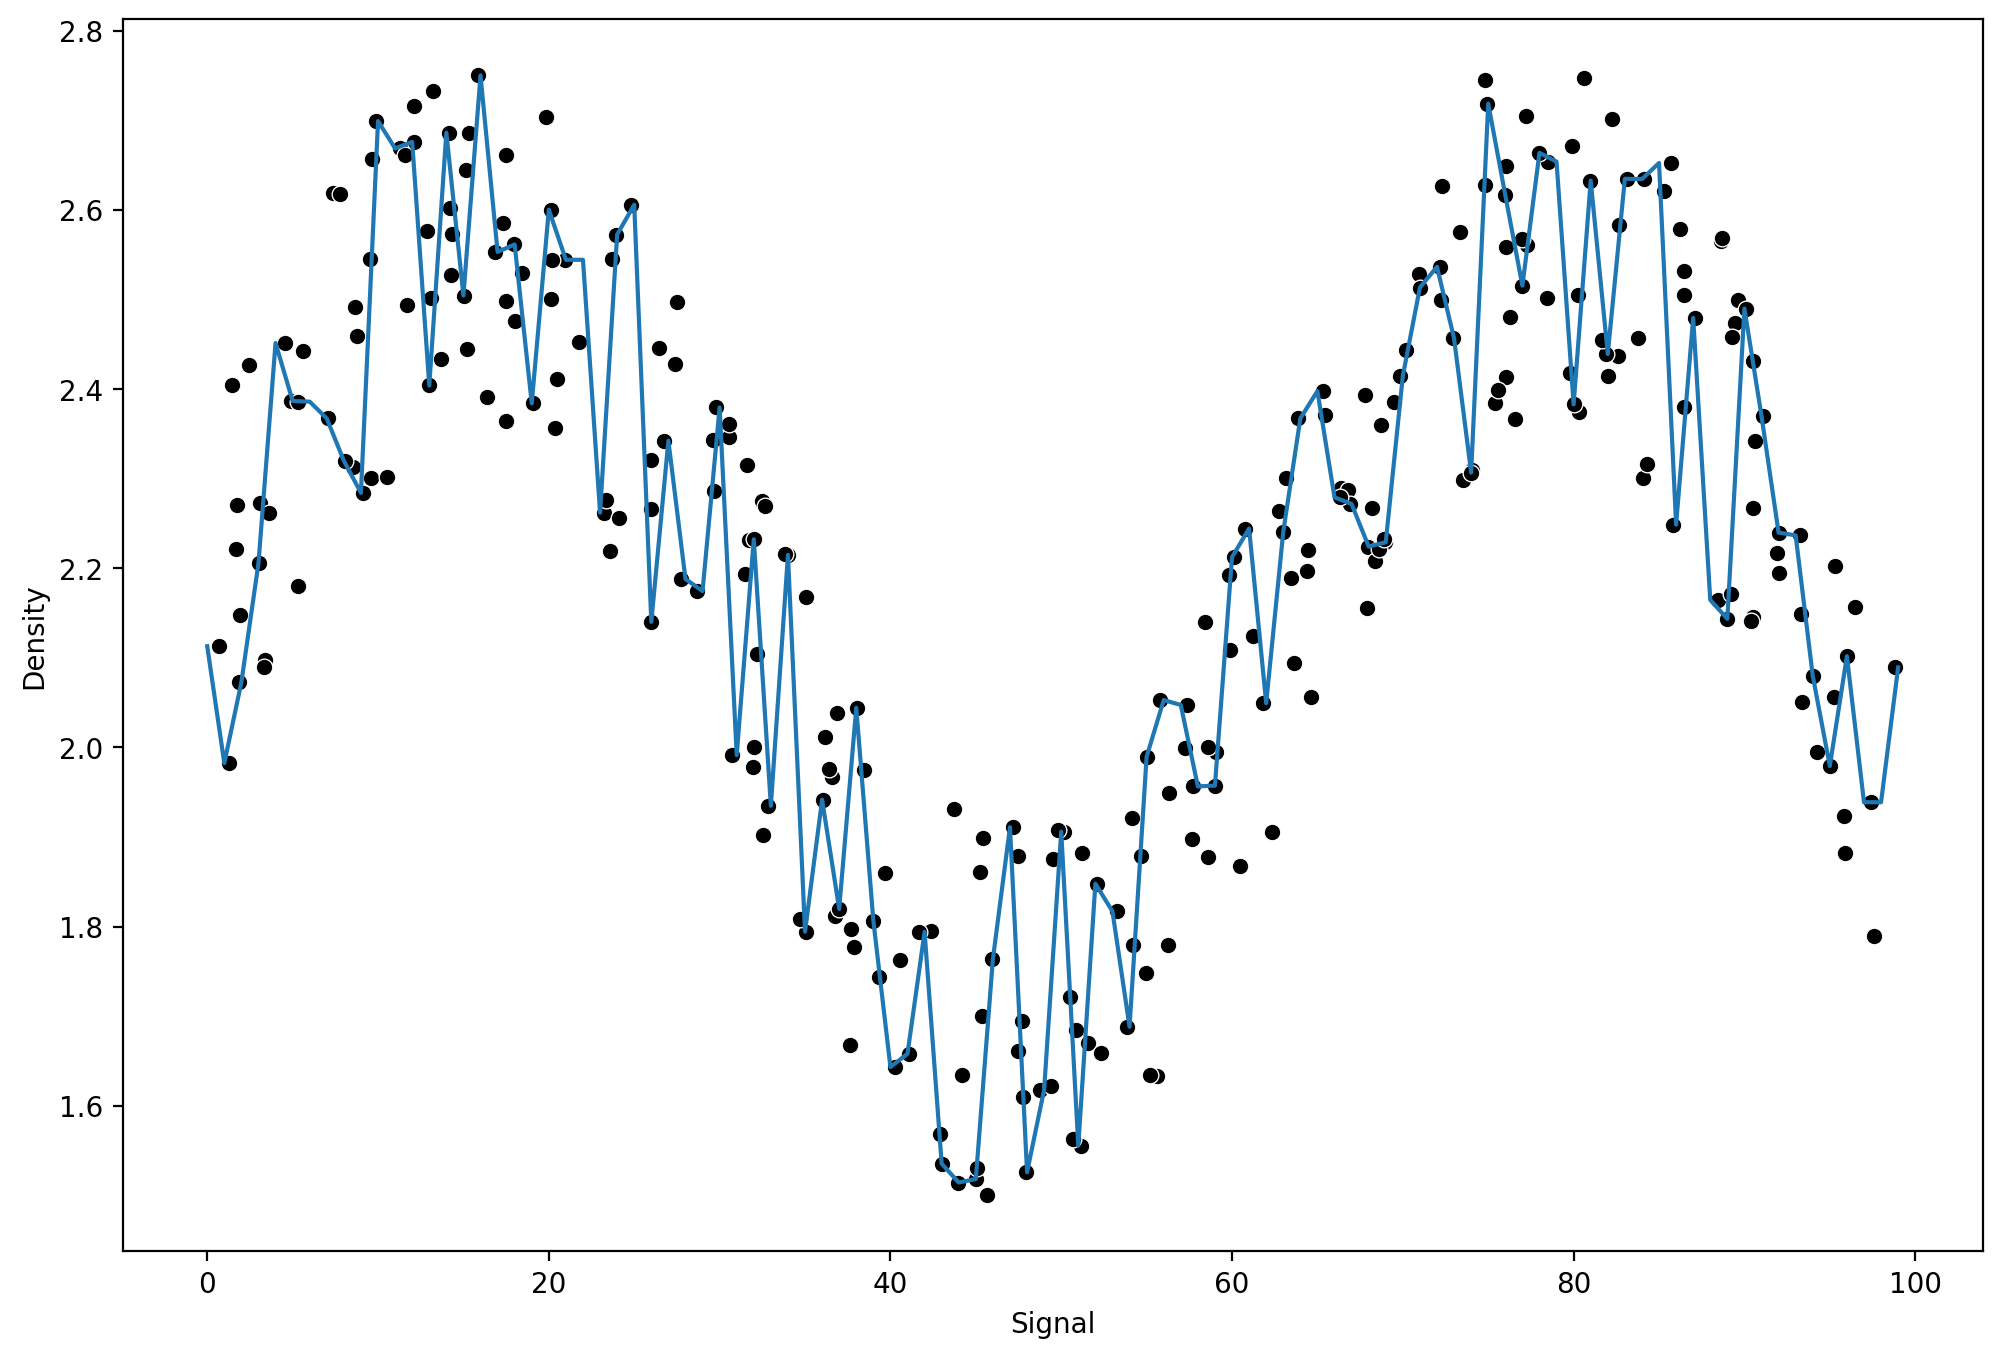

In [48]:
model = DecisionTreeRegressor()
run_model(model,X_train,y_train,X_test,y_test)

<h1>Support Vector Regressor</h1>

In [49]:
from sklearn.svm import SVR

In [50]:
from sklearn.model_selection import GridSearchCV

In [51]:
svr = SVR()
param_grid = {'C':[0.01,0.1,1,5,100,1000],
             'gamma':['auto','scale']}


grid = GridSearchCV(svr,param_grid)

MAE: 0.10854210121348368
RMSE: 0.12646999302046696


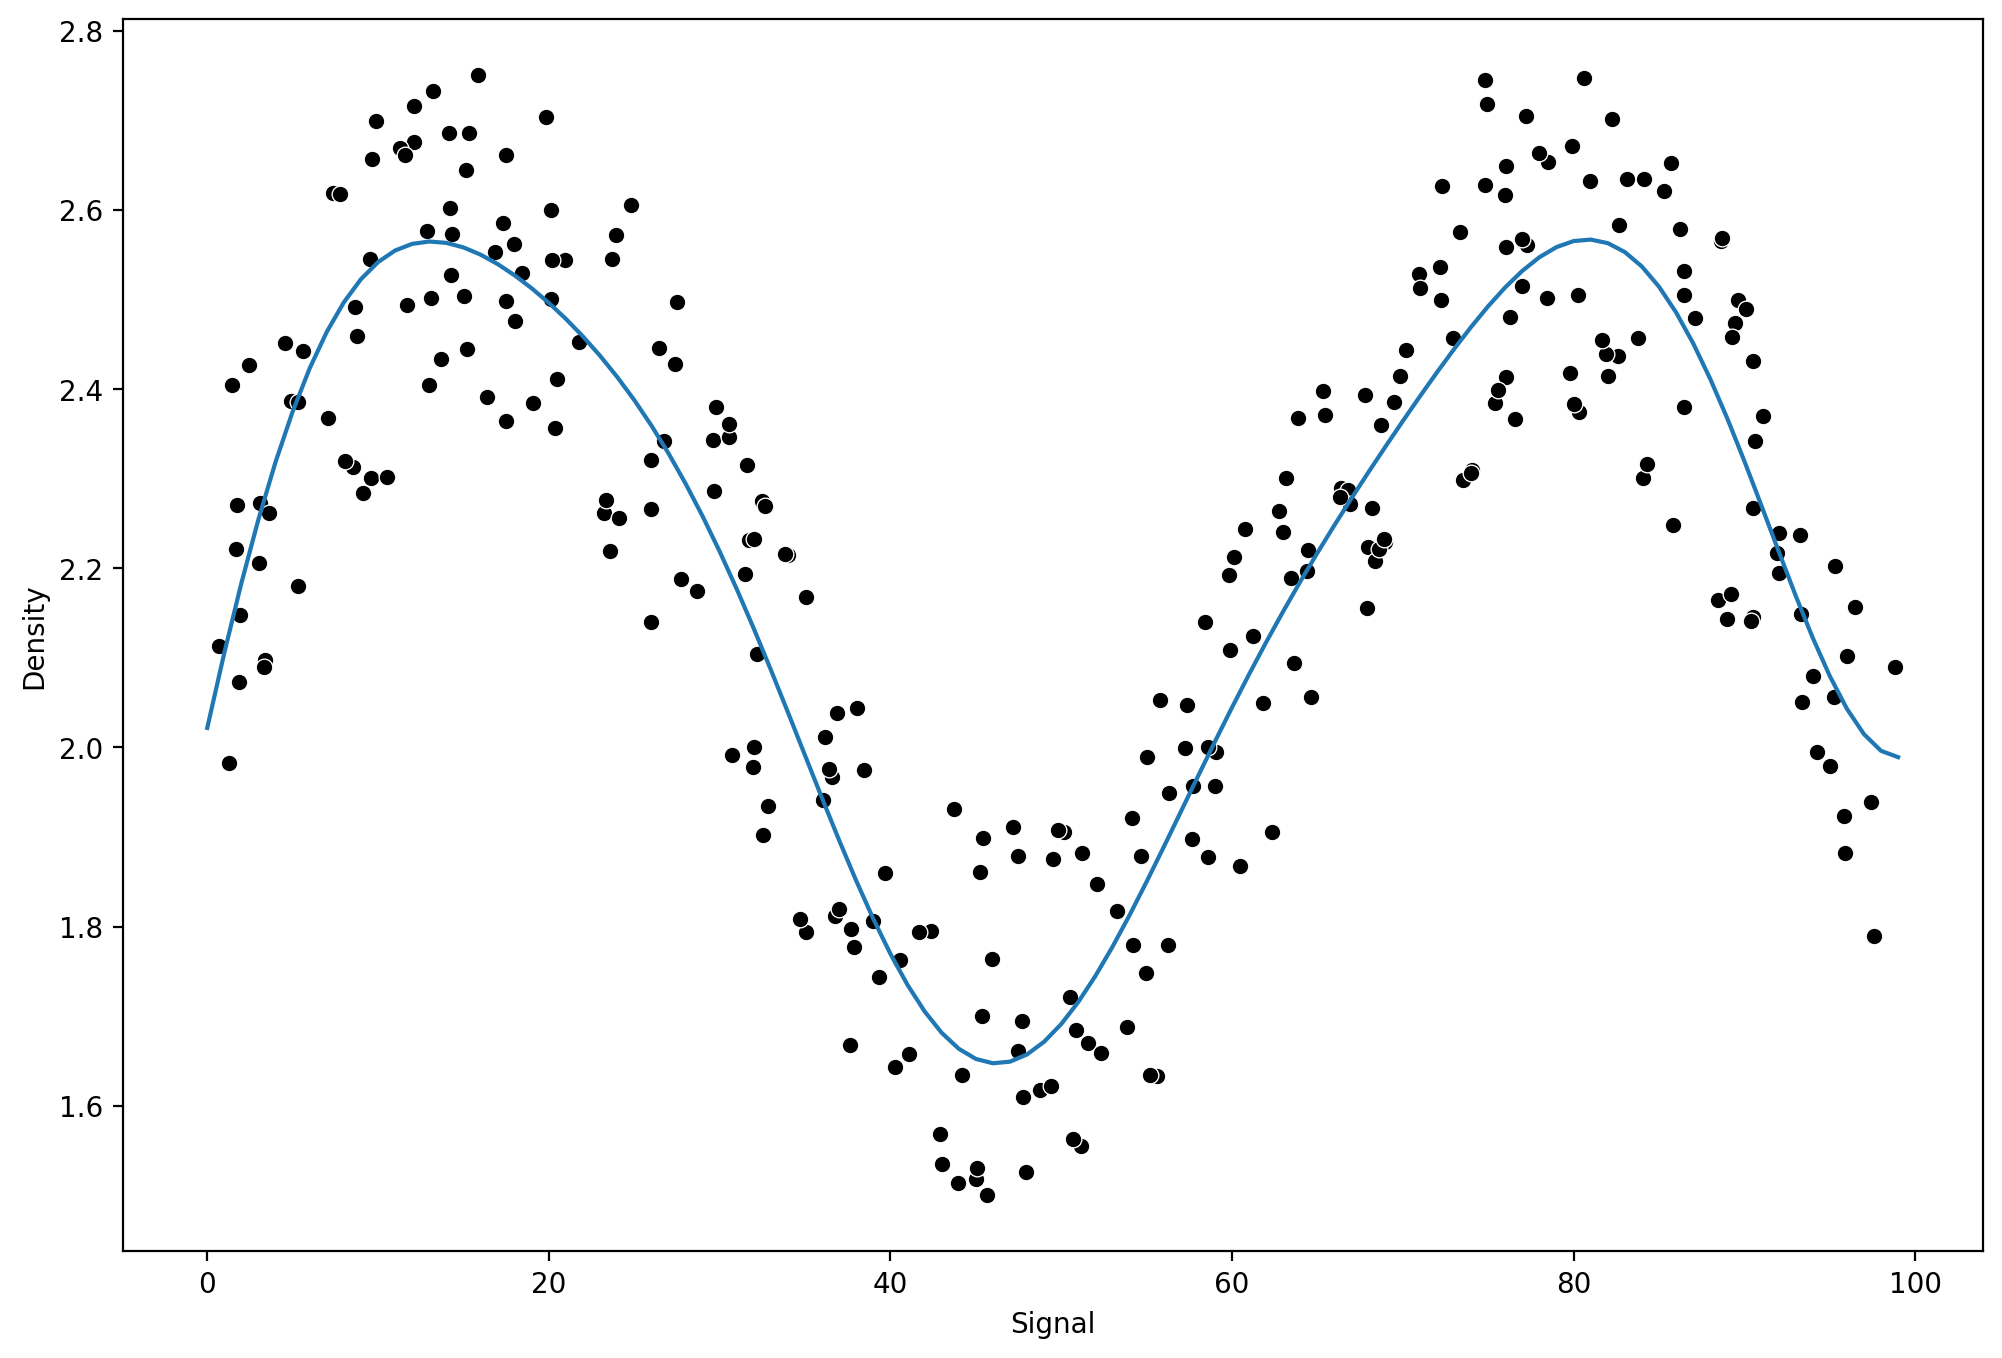

In [52]:
run_model(grid,X_train,y_train,X_test,y_test)

<h1>Random Forest Regressor</h1>

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rfr = RandomForestRegressor(n_estimators=10)

MAE: 0.1085959068300822
RMSE: 0.13110804413430652


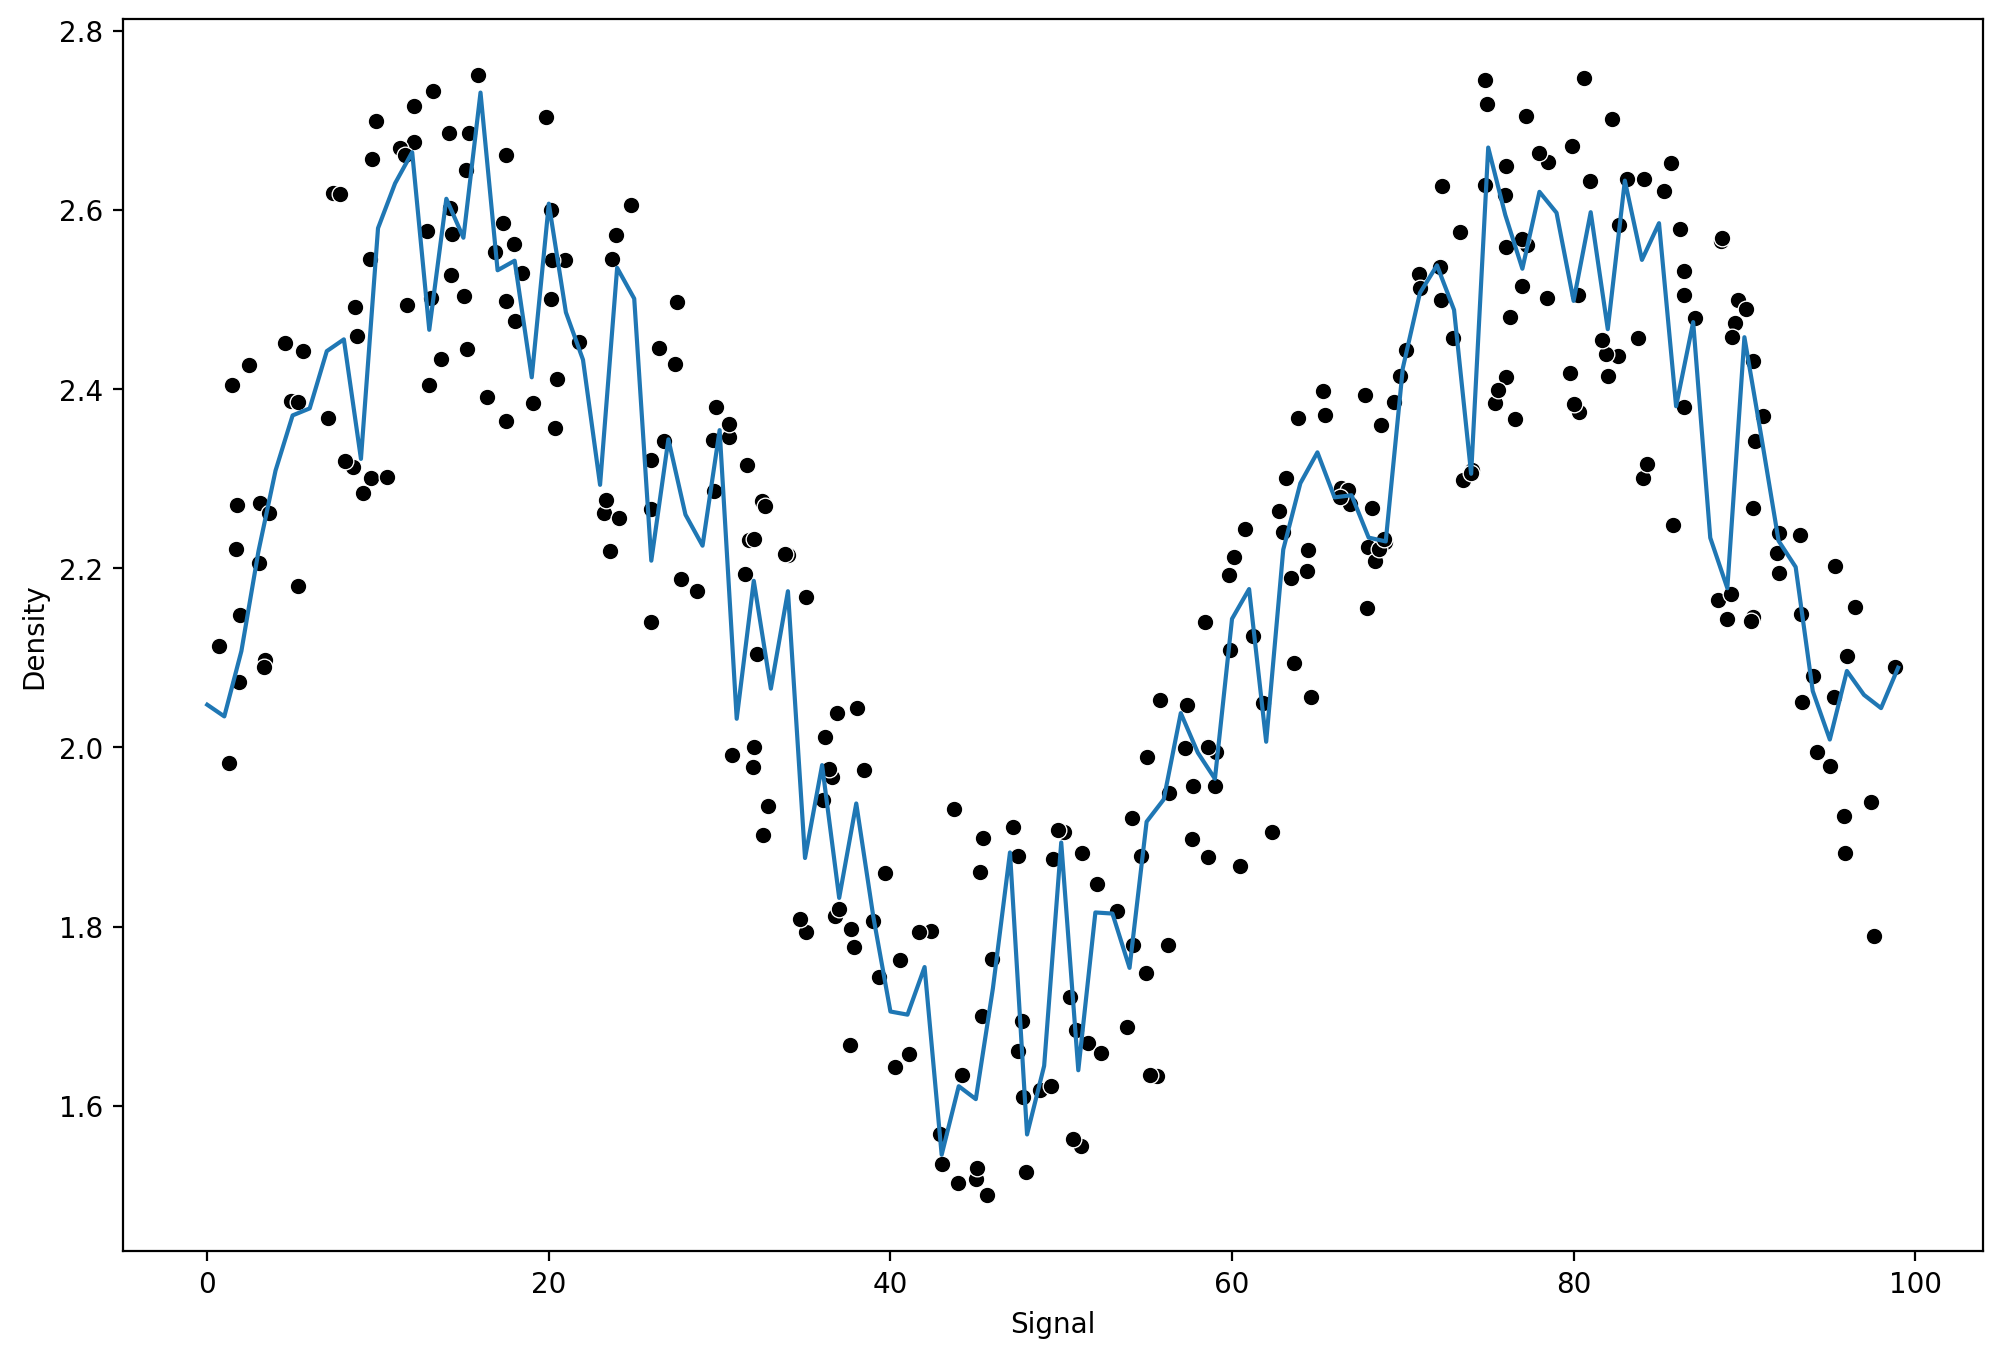

In [55]:
run_model(rfr,X_train,y_train,X_test,y_test)

<h1>Boosting </h1>

In [56]:
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


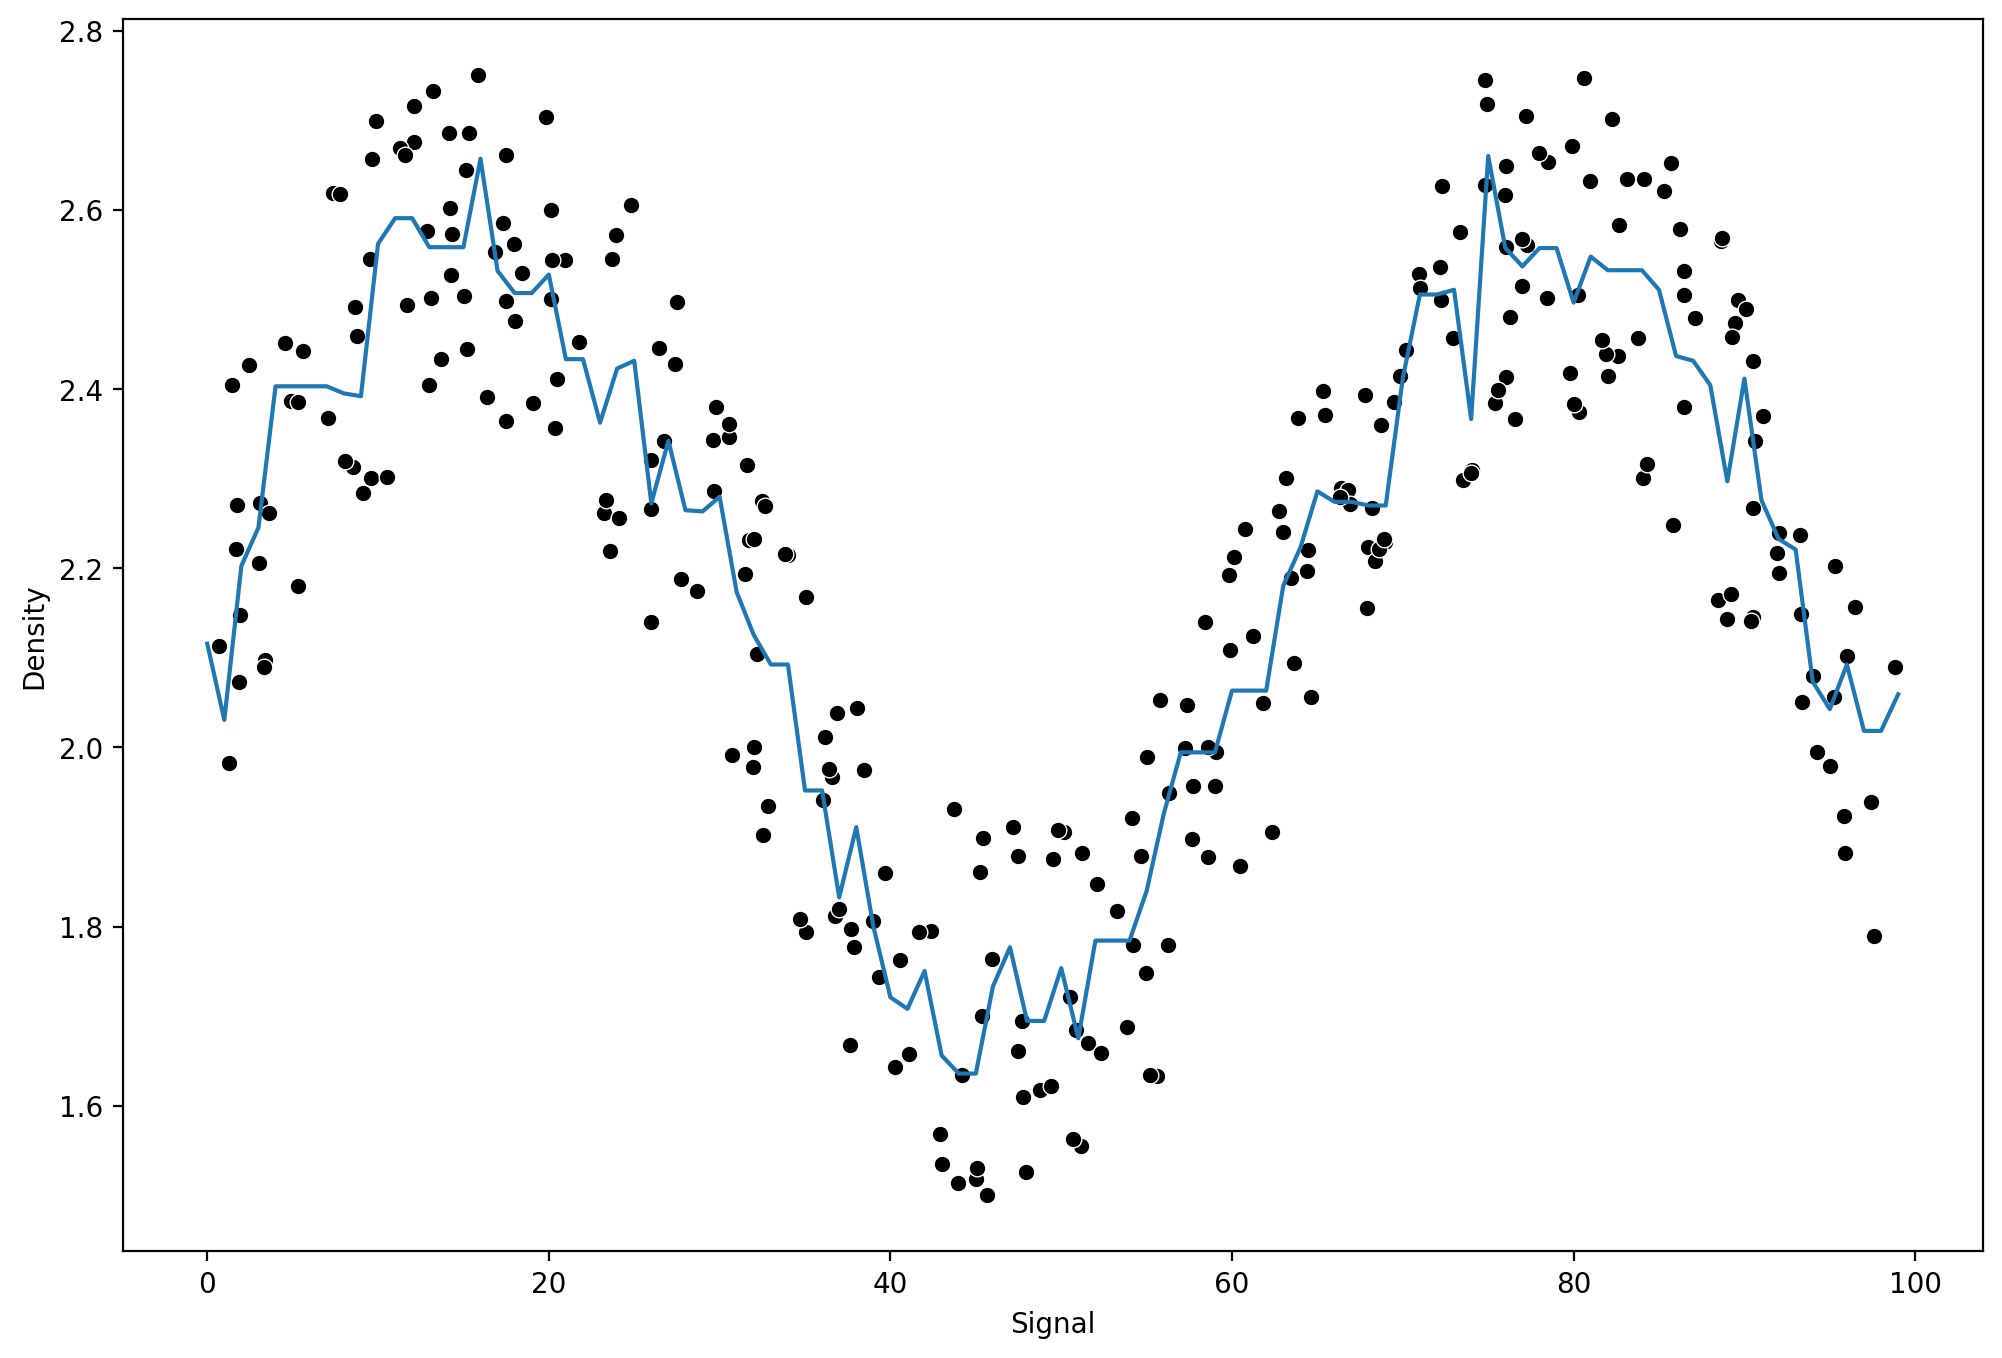

In [60]:
model = GradientBoostingRegressor()
run_model(model,X_train,y_train,X_test,y_test)

MAE: 0.11498912694977843
RMSE: 0.13528724710742487


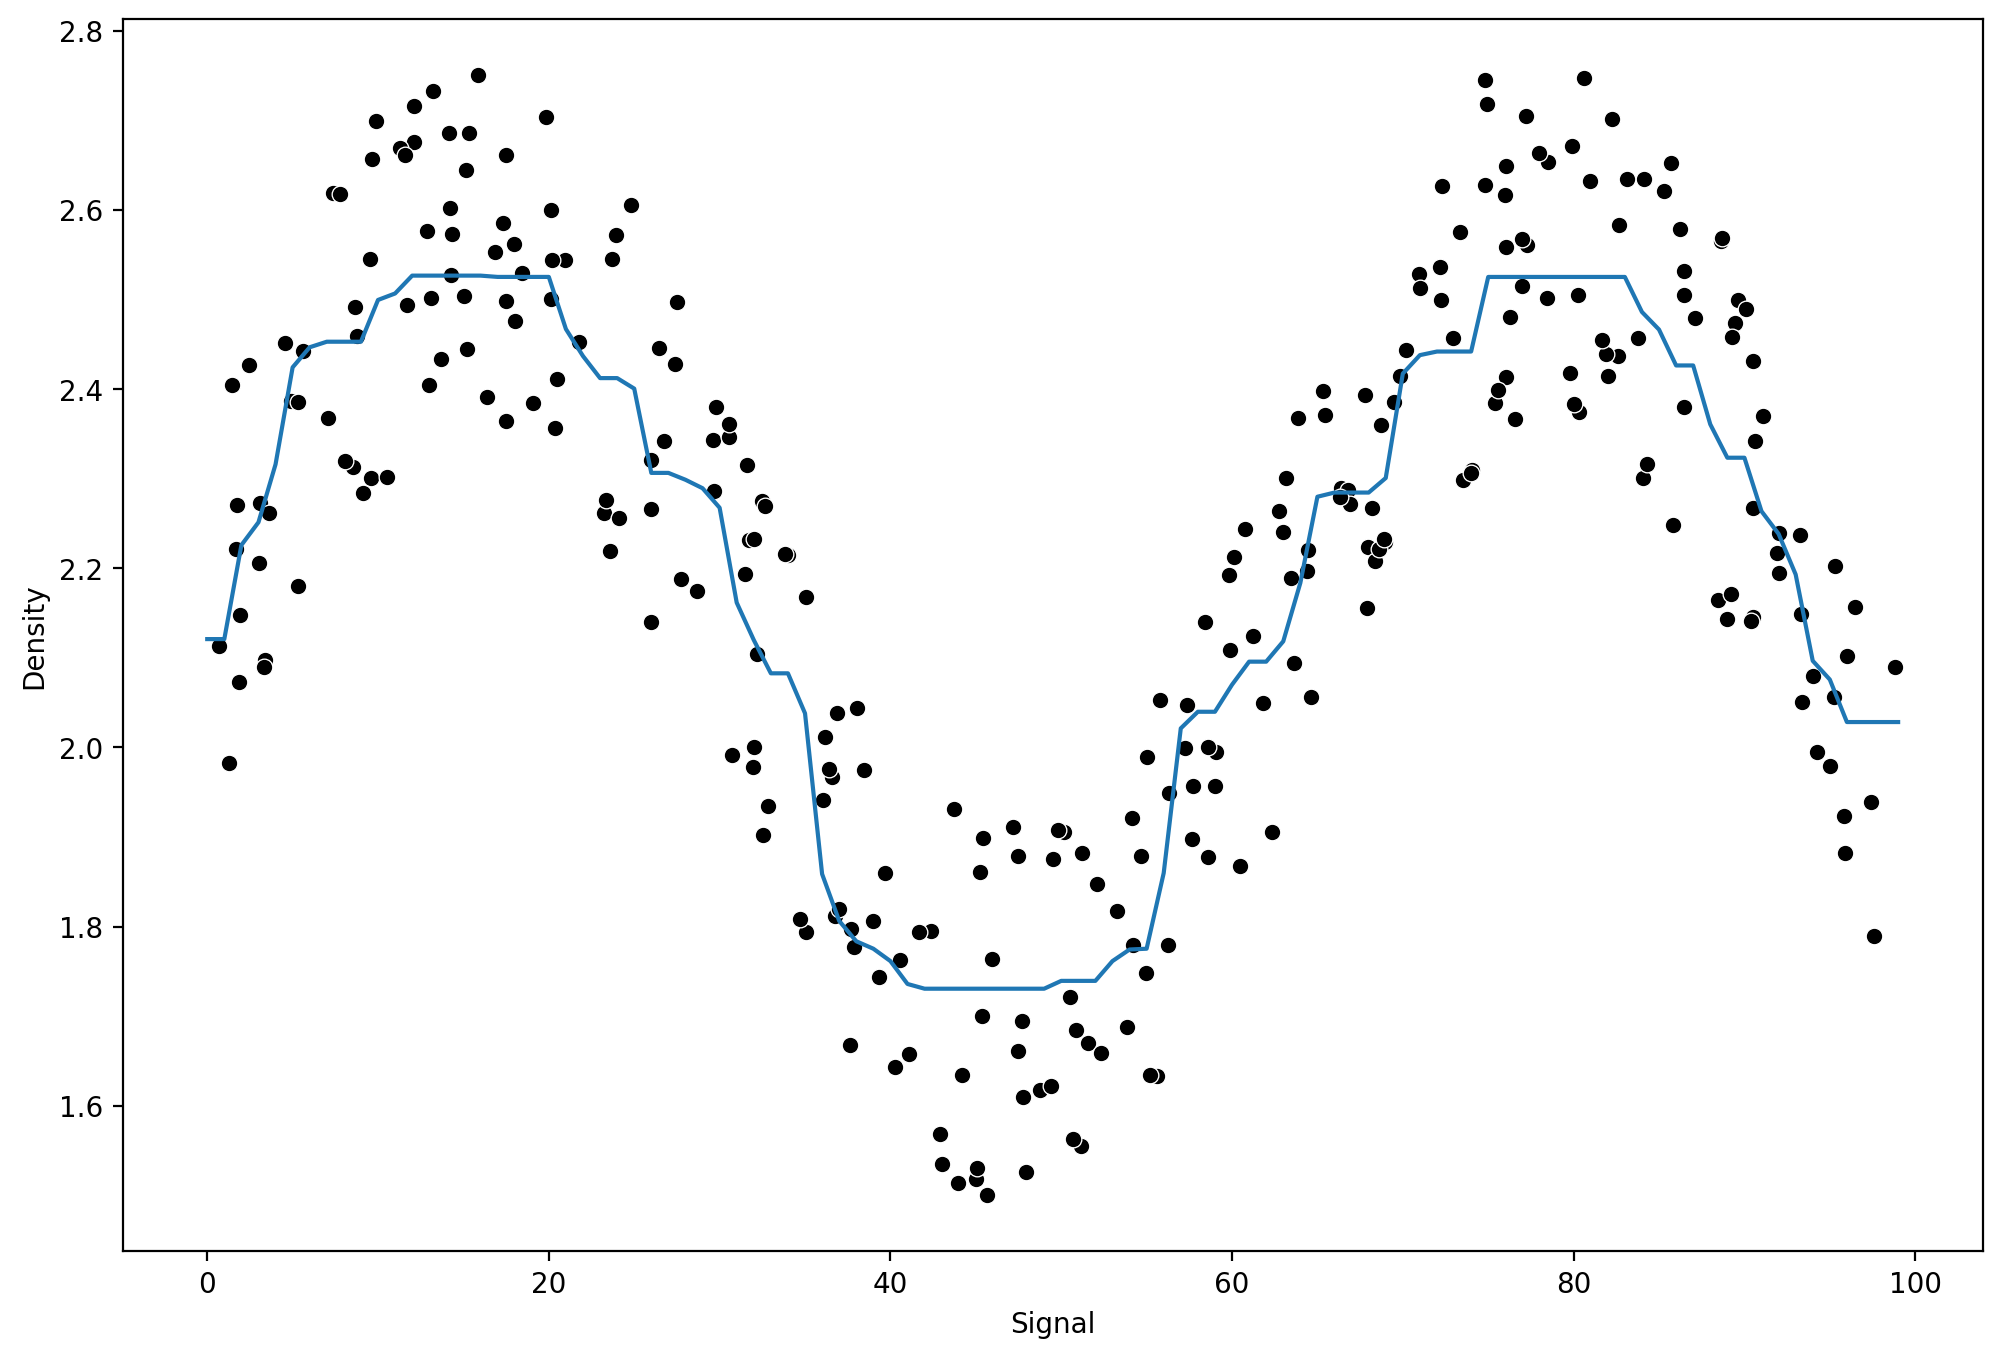

In [59]:
model = AdaBoostRegressor()
run_model(model,X_train,y_train,X_test,y_test)